In [1]:
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from geopy.distance import geodesic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.neighbors import NearestNeighbors

import json
try:
  import osmnx as ox
  import networkx as nx
except:
  !pip install osmnx networkx
  import osmnx as ox
  import networkx as nx


# Data Extraction

In [3]:
data = pd.read_csv('Data_saved/points_by_clusters.csv')
data.head()

,Unnamed: 0,y,x,categ,categories,cluster7,cluster10,cluster15,cluster20
0,0,33.544667,-7.640401,0,SuperMarkets,1.0,4.0,6.0,7.0
1,1,33.594538,-7.595292,0,SuperMarkets,5.0,0.0,1.0,0.0
2,2,33.574692,-7.708105,0,SuperMarkets,2.0,4.0,7.0,17.0
3,3,33.577157,-7.674181,0,SuperMarkets,2.0,4.0,3.0,17.0
4,4,33.587934,-7.639303,0,SuperMarkets,2.0,5.0,11.0,5.0


In [34]:
d1.to_csv('Data_saved/d1.csv')
d2.to_csv('Data_saved/d2.csv')
d3.to_csv('Data_saved/d3.csv')
d4.to_csv('Data_saved/d4.csv')
d5.to_csv('Data_saved/d5.csv')
d6.to_csv('Data_saved/d6.csv')
d7.to_csv('Data_saved/d7.csv')
d8.to_csv('Data_saved/d8.csv')
d9.to_csv('Data_saved/d9.csv')
d10.to_csv('Data_saved/d10.csv')

In [35]:
centers10

NameError: name 'centers10' is not defined

In [4]:
data_copy = data
data_copy['categories'] = data_copy['categories'].replace('Universités', 'Universities')
data_copy 

,Unnamed: 0,y,x,categ,categories,cluster7,cluster10,cluster15,cluster20
0,0,33.544667,-7.640401,0,SuperMarkets,1.0,4.0,6.0,7.0
1,1,33.594538,-7.595292,0,SuperMarkets,5.0,0.0,1.0,0.0
2,2,33.574692,-7.708105,0,SuperMarkets,2.0,4.0,7.0,17.0
3,3,33.577157,-7.674181,0,SuperMarkets,2.0,4.0,3.0,17.0
4,4,33.587934,-7.639303,0,SuperMarkets,2.0,5.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...
267,267,33.592754,-7.627492,4,Universities,2.0,5.0,11.0,11.0
268,268,33.545617,-7.663752,4,Universities,1.0,4.0,6.0,7.0
269,269,33.550893,-7.667131,4,Universities,1.0,4.0,6.0,7.0
270,270,33.539804,-7.664188,4,Universities,1.0,4.0,6.0,7.0


In [5]:
data_copy.categories.unique()

array(['SuperMarkets', 'ATMs', 'Fuel_Stations', 'Gares_stations',
       'Universities'], dtype=object)

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/Projet_These/Data_Extraction/True_All_Attractives.csv')
dt = dt[['y', 'x', 'categ']]
dt.head()

,y,x,categ
0,33.544667,-7.640401,0
1,33.594538,-7.595292,0
2,33.574692,-7.708105,0
3,33.577157,-7.674181,0
4,33.587934,-7.639303,0


In [ ]:
dt1 = dt.dropna()
dt1.head()

         # Categories
# 0 -------> SuperMarkets
# 1 -------> ATMs
# 2 -------> Fuel Stations
# 3 -------> Gares stations
# 4 -------> Universités

,y,x,categ
0,33.544667,-7.640401,0
1,33.594538,-7.595292,0
2,33.574692,-7.708105,0
3,33.577157,-7.674181,0
4,33.587934,-7.639303,0


In [ ]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 456
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       272 non-null    float64
 1   x       272 non-null    float64
 2   categ   272 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.5 KB


In [129]:
# Télécharger le graphe CASABLANCA à partir de la bounding box
graph = ox.load_graphml("street_casa (1).graphml")
#nodes = ox.graph_to_gdfs(graph, edges=False)

In [147]:
nodes

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
21037874,33.571885,-7.567265,3,NaN,NaN,POINT (-7.56727 33.57188)
21038899,33.517052,-7.631935,3,motorway_junction,NaN,POINT (-7.63193 33.51705)
21038922,33.560477,-7.594420,3,NaN,NaN,POINT (-7.59442 33.56048)
21039018,33.532445,-7.570669,3,NaN,NaN,POINT (-7.57067 33.53245)
21039030,33.527767,-7.565626,3,NaN,NaN,POINT (-7.56563 33.52777)
...,...,...,...,...,...,...
11395204506,33.585227,-7.545945,3,NaN,NaN,POINT (-7.54594 33.58523)
11398971202,33.523500,-7.543214,1,NaN,NaN,POINT (-7.54321 33.52350)
11398971203,33.523498,-7.542038,4,NaN,NaN,POINT (-7.54204 33.52350)


# Functions Building

In [5]:
def shortest_path_distance(graph, node1, node2):
  '''
  calcule la distance du plus court chemin entre deux points dans le graphe
  ENTREES :
      graph : un graphe osmnx composé de noeuds et d arrets
      node1, node2 : deux points qui seront remplacés par les points du graphe les plus proche d'eux
  SORTIE :
      la plus courte distance entre node1 et node2
  '''
  try:
      n1 = ox.nearest_nodes(graph, tuple(node1)[1], tuple(node1)[0])
      n2 = ox.nearest_nodes(graph, tuple(node2)[1], tuple(node2)[0])
      return nx.shortest_path_length(graph, n1, n2, weight='length')
  except nx.NetworkXNoPath:
      return np.inf

In [6]:
def kmeans_standard(data, k):
    # Utiliser la classe KMeans de scikit-learn
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[['y', 'x']])

    # Récupérer les centroides
    centroids = kmeans.cluster_centers_

    return centroids

In [7]:
def kmeans_custom_init(data, k, graph):
    # Initialiser les centroïdes de manière aléatoire
    centroids = kmeans_standard(data, k)

    # Initialiser les étiquettes des clusters
    labels = np.zeros(len(data))

    # Nombre d'itérations
    max_iterations = 1

    for x in range(max_iterations):
        # Assigner chaque point au cluster le plus proche
        for i in range(len(data)):
            point = data.iloc[i][['y', 'x']].values
            distances = [shortest_path_distance(graph, tuple(point), tuple(c)) for c in centroids]
            labels[i] = np.argmin(distances)
            print('point : ', i, ' Assigned', ' itération :', x+1,'/',max_iterations)

        # Mettre à jour les centroïdes en utilisant la moyenne des points de chaque cluster
        for j in range(k):
            cluster_points = data[labels == j][['y', 'x']].values
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)
            print(f'the {j}th cluster is updated succefully')

    return labels, centroids

In [8]:
def moyennes_par_cluster(dataframe):

    # Initialisation d'une matrice pour stocker les moyennes par classe
    moyennes_par_classe = np.zeros((10, 2))  # 7 classes, 2 colonnes (moyenne x et moyenne y)

    # Boucle pour calculer les moyennes pour chaque classe
    for i in range(10):
        # Extraction des données pour la classe i
        classe_i_data = dataframe[dataframe['cluster10'] == i][['x', 'y']]

        # Calcul des moyennes en x et y pour la classe i
        moyenne_x = classe_i_data['x'].mean()
        moyenne_y = classe_i_data['y'].mean()

        # Stockage des moyennes dans la matrice
        moyennes_par_classe[i, 0] = moyenne_x
        moyennes_par_classe[i, 1] = moyenne_y

    return moyennes_par_classe

In [9]:
centers10 = moyennes_par_cluster(data)
df_centers10 = pd.DataFrame(centers10)
df_centers10.columns = ['x', 'y']
df_centers10.to_csv('Data_saved/centers10.csv')
df_centers10

,x,y
0,-7.602872,33.589536
1,-7.732970,33.515073
2,-7.536166,33.406505
3,-7.509574,33.593414
4,-7.668154,33.559677
5,-7.634587,33.586499
6,-7.575092,33.552803
7,-7.511688,33.481849
8,-7.448201,33.621060
9,-7.639253,33.504218


In [10]:
def dbscan_clustering(data, eps, min_samples):
  # Utiliser la classe DBSCAN de scikit-learn
  dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine')

  # Appliquer le clustering
  labels = dbscan.fit_predict(np.radians(data[['y', 'x']]))

  # Ajouter les labels des clusters au DataFrame
  data['DBcluster'] = labels

  return data

In [11]:
def plot_dbscan_elbow1(data, min_samples=3):
    # Fit a k-nearest neighbors model
    neighbors_model = NearestNeighbors(n_neighbors=min_samples)
    neighbors_model.fit(np.radians(data[['y', 'x']]))

    # Calculate distances to the k-nearest neighbors
    distances, indices = neighbors_model.kneighbors()

    # Sort distances and plot the k-distance graph
    sorted_distances = np.sort(distances[:, -1])
    plt.plot(np.arange(len(sorted_distances)), sorted_distances, marker='o')
    plt.title('kNN Distance Plot for DBSCAN Parameter Selection')
    plt.xlabel('Data Point Index')
    plt.ylabel(f'{min_samples}-NN Distance')
    plt.show()

In [12]:
def plot_dbscan_elbow2(data, graph, min_samples=3):
    # Fit a k-nearest neighbors model
    neighbors_model = NearestNeighbors(n_neighbors=min_samples)
    neighbors_model.fit(data[['y', 'x']])

    # Calculate distances to the k-nearest neighbors using shortest path distance
    distances = np.zeros((len(data), min_samples))
    for i in range(len(data)):
        point = data.iloc[i][['y', 'x']].values
        distances[i, :] = [shortest_path_distance(graph, tuple(point), tuple(data.iloc[idx][['y', 'x']].values)) for idx in neighbors_model.kneighbors([point], return_distance=False)[0]]

    # Sort distances and plot the k-distance graph
    sorted_distances = np.sort(distances[:, -1])
    plt.plot(np.arange(len(sorted_distances)), sorted_distances, marker='o')
    plt.title('kNN Distance Plot for DBSCAN Parameter Selection')
    plt.xlabel('Data Point Index')
    plt.ylabel(f'{min_samples}-NN Shortest Path Distance')
    plt.show()

In [13]:
def calculate_distances_from_dataframe(df1, df2):
    """
    Calcule les distances géodésiques entre deux ensembles de points en utilisant Geopy.

    :param df1: DataFrame Pandas avec les colonnes 'latitude' et 'longitude' pour le premier ensemble de points.
    :param df2: DataFrame Pandas avec les colonnes 'latitude' et 'longitude' pour le deuxième ensemble de points.
    :return: Matrice des distances géodésiques entre les points des deux ensembles.
    """
    points_set1 = list(zip(df1['y'], df1['x']))
    points_set2 = list(zip(df2['y'], df2['x']))

    distances = np.zeros((len(points_set1), len(points_set2)))

    for i, coord1 in enumerate(points_set1):
        for j, coord2 in enumerate(points_set2):
            distances[i, j] = geodesic(coord1, coord2).km

    return distances

In [14]:

coordonnees = d1[['x', 'y']]
Dist = calculate_distances_from_dataframe(coordonnees, coordonnees)

NameError: name 'd1' is not defined

In [ ]:
from statistics import mean
def k_ripley(df, distance_matrix, R_distance):
    
    Dist = distance_matrix
    R = R_distance
    K_ripley_list = []
    
    for i in range(len(df)):
        count = 0
        for j in range(len(df)):
            if i != j:
                if Dist[i, j] <= R :
                    count += 1
        K_ripley_list.append(count)
    K_ripley = mean(K_ripley_list)
    
    return K_ripley

tenClusters = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]
dist_r = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 2]
ilist_mylist =[]
for d in tenClusters :
    ilist = []
    mylist = []
    coordonnees = d[['x', 'y']]
    Dist = calculate_distances_from_dataframe(coordonnees, coordonnees)
    for i in dist_r:
        ilist.append(i)
        mylist.append(k_ripley(d[['x','y']], distance_matrix=Dist, R_distance=i))
    ilist_mylist.append(mylist)


In [ ]:
for i in range(len(ilist_mylist)):
    plt.plot(ilist, ilist_mylist[i], label=f'zone {i+1}')
    plt.xlabel('Distance r')
    plt.ylabel('Mean of Neighbor <= r')
    plt.legend()
    plt.savefig('ripley_perso.png')

In [ ]:
ilist_mylist

In [37]:
def calculate_geodesic_distances(df, centroid):
    """
    Calcule les distances géodésiques entre chaque ligne du DataFrame et un point centroïde.

    :param df: DataFrame Pandas avec les colonnes 'latitude' et 'longitude'.
    :param centroid: Tuple (longitude, latitude) représentant le point centroïde.
    :return: Le DataFrame original avec une nouvelle colonne 'distance' contenant les distances géodésiques.
    """
    # Copie du DataFrame pour éviter de modifier l'original
    df_result = df.copy()

    # Fonction pour calculer la distance géodésique entre deux points
    def calculate_distance(row):
        return geodesic((row['y'], row['x']), centroid).km

    # Application de la fonction à chaque ligne du DataFrame
    df_result['a_1'] = df_result.apply(calculate_distance, axis=1)

    return df_result

In [38]:
def calculate_network_distances(df1, df2):
    """
    Calcule les distances sur le réseau routier entre deux ensembles de points en utilisant OSMnx.

    :param df1: DataFrame Pandas avec les colonnes 'latitude' et 'longitude' pour le premier ensemble de points.
    :param df2: DataFrame Pandas avec les colonnes 'latitude' et 'longitude' pour le deuxième ensemble de points.
    :param network_type: Type de réseau (par défaut, 'drive' pour les routes).
    :return: Matrice des distances sur le réseau routier entre les points des deux ensembles.
    """
    # Créer un graphe du réseau routier à partir d'une boîte englobante autour des points
    G = ox.graph_from_bbox(max(df1['latitude']), min(df1['latitude']), max(df1['longitude']), min(df1['longitude']), network_type=network_type)
    #G = graph
    points_set1 = list(zip(df1['y'], df1['x']))
    points_set2 = list(zip(df2['y'], df2['x']))

    distances = np.zeros((len(points_set1), len(points_set2)))

    for i, coord1 in enumerate(points_set1):
        for j, coord2 in enumerate(points_set2):
            # Trouver le nœud le plus proche sur le réseau pour chaque point
            node1 = ox.distance.nearest_nodes(G, coord1[0], coord1[1])
            node2 = ox.distance.nearest_nodes(G, coord2[0], coord2[1])
            print(i, ' AND ', j)

            # Calculer la distance la plus courte sur le réseau entre les deux nœuds
            route_length = nx.shortest_path_length(G, node1, node2, weight='length')
            distances[i, j] = route_length

    return distances

In [39]:
def calculer_effectif_proximite(df, distance_limite):
    # Créer une matrice de distances entre tous les points
    coordonnees = df[['x', 'y']]
    distances = calculate_distances_from_dataframe(coordonnees, coordonnees)
    #distances = calculate_network_distances(coordonnees, coordonnees)
    
    # Initialiser une liste pour stocker les informations du voisinage
    voisinage_infos = []
    
    
    # Parcourir chaque ligne du DataFrame
    for i, row in df.iterrows():
        dist = []
        
        # Sélectionner les points à une distance inférieure à distance_limite
        indices_proximite = np.where(distances[i] < distance_limite)[0]
        
        # Compter l'effectif de chaque categorie dans le voisinage
        effectif_par_type = df.iloc[indices_proximite]['categ'].value_counts().to_dict()

        #Ajouter les informations de la distance 
        for j in indices_proximite:
            dist.append(distances[i][j])
            
        # Ajouter les informations du voisinage à la liste
        voisinage_infos.append({
            'distance': dist,
            'indices_proximite': indices_proximite ,
            'effectif_par_type': {
                type_: effectif_par_type.get(type_, 0) for type_ in df['categ'].unique()
            }
        })

    # Créer une nouvelle colonne avec les informations du voisinage
    df['voisinage_info'] = voisinage_infos
    return df

In [40]:
def resumer(df, distance_limite):
    dframe = calculer_effectif_proximite(df[['x', 'y', 'categ']], distance_limite)
    dframe1 = pd.DataFrame(list(dframe.voisinage_info))
    dframe2 = pd.DataFrame(list(dframe1.effectif_par_type))
    cols = []
    for x in dframe2.columns:
        cols.append(dict_categ[x])
    dframe2.columns = cols
    #dframe2.columns = ['SuperMarkets', 'ATMs', 'Fuel_Stations','Gares_stations', 'Universités']
    dframe2['tot_voisinage'] = dframe2.sum(axis=1) - 1
    
    return pd.concat([df[['x', 'y', 'categ', 'categories']] ,dframe1, dframe2], axis=1)

In [77]:
def df_resum_et_classement(df, centersX, num_cluster=0, alpha_1=50, alpha_2=1, rang=1):
    '''
    prends en entree les df d'une classe donnee et renvoie le df du classement selon l'attractivite et
    la liste des indexe des attracteurs que couvre l'attracteur dominant.
    '''
    dict_categ = {
        0:'SuperMarkets',
        1:'ATMs',
        2:'Fuel_Stations',
        3:'Gares_stations',
        4:'Universités',}
    centroid = (centersX[num_cluster][0], centersX[num_cluster][1])
    df1 = calculate_geodesic_distances(df, centroid)
    df1['categories'] = df1.categ.apply(lambda x: dict_categ[x])
    df1['a_2'] =1 - df1.tot_voisinage/df1.tot_voisinage.max()
    df1['a_3'] = df1.a_1/df1.a_1.max()
    df1['classement'] = (alpha_1 * df1.a_2) + (alpha_2 * df1.a_3)
    df1['rank'] = df1['classement'].rank(ascending=True, method='dense').astype(int)
    df1 = df1.sort_values(by='classement')
    a = df1.loc[[df1.index[rang-1]]].indices_proximite
    x = df1.loc[df1.index[rang-1]].x
    y = df1.loc[df1.index[rang-1]].y
    xy = [x, y]
    def list_a(a):
        l = []
        for i in a :
            for j in i:
                l.append(j)
        return l

    return df1, list_a(a), xy

In [60]:
def plot_classement_coverage(df, xy, centersX, num_zone=1):
    plt.scatter(df.x, df.y, s=50, label='Attractors', c=df.classement, cmap='viridis')
    plt.scatter(xy[0], xy[1], c='red', s=10, marker='D', label='Optimal PLs position')
    plt.scatter(centersX[num_zone][0],centersX[num_zone][1], c='red', marker='X', s=80, label='Zone centroid' )

    plt.title(f'Rank of each attractor in Zone{num_zone+1}')
    plt.colorbar(label='non attractiveness')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

In [72]:
def plot_attractors_coverage(df, xy, centersX,list_a, num_zone=1, max_zones=7, couleur='green'):
    plt.scatter(df.x, df.y, s=50, c='blue')
    plt.scatter(df.loc[list_a].x, df.loc[list_a].y, c=couleur, s=65, label='Coverage area of the PL' )
    plt.scatter(xy[0], xy[1], c='red', s=10, marker='D', label='Optimal PLs position')
    plt.scatter(centersX[num_zone][0],centersX[num_zone][1], c='red', marker='X', s=80)
    plt.title(f'Zone {num_zone+1}/{max_zones}, coverage area \n for 1Km accessibility distance ')
    #plt.colorbar(label='Poids')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

In [70]:
def plot_attractors_coverage2(df, xy, centersX,list_a, num_zone=1, max_zones=7, couleur='green', rang=2):
    #plt.scatter(df.x, df.y, s=50, label='attracteurs')
    plt.scatter(df.loc[list_a].x, df.loc[list_a].y, c=couleur, s=60, label=f'coverage area PL {rang}' )
    plt.scatter(xy[0], xy[1], c='red', s=10, marker='D')
    #plt.scatter(centersX[num_zone][1],centersX[num_zone][0], c='red', marker='X', s=80, label='centroide' )
    #plt.title(f'Zone {num_zone+1}/{max_zones} ')
    plt.legend()
    

In [44]:
def plot_One_class(data, clusterX, num_zone=0, couleur='green'):
    max_zones = len(data[clusterX].unique())
    dfc = data[data[clusterX]==num_zone]
    df_autres = data[data[clusterX]!=num_zone]
    
    plt.scatter(dfc.x, dfc.y, c=couleur, label=f'Attractors zone {num_zone+1}')
    plt.scatter(df_autres.x, df_autres.y, c='grey', label='Other attrctors facilities')
    
    plt.title(f'Zoom on zone {num_zone+1}/{max_zones}')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

In [45]:
def plot_Multiple_class(data, clusterX, list_zone=[0, 5, 9]):
    max_zones = len(data[clusterX].unique())
    dfc = []
    for i in list_zone :
        dfc.append(data[data[clusterX]==i])

    plt.scatter(data.x, data.y, c='grey', label='Other attrctors facilities')
    for x in range(len(list_zone)):
        plt.scatter(dfc[x].x, dfc[x].y, label=f'Attractors zone {list_zone[x]+1}')
    
    plt.title(f'Zoom on zones {list_zone}/{max_zones}')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

In [46]:
def resumer_et_choix_PLs(data, clusterX, centersX, covered_dist=1, alpha_1=1, alpha_2=1):
    choix = np.zeros((len(data[clusterX].unique()), 2))
    dict_indexs ={}
    for i in data[clusterX].unique():
        resum = resumer(data[data[clusterX]==i].reset_index(drop=True), covered_dist)
        df_classement, index_voisins, xy_choix = df_resum_et_classement(df=resum, centersX=centersX, num_cluster=int(i), alpha_1=alpha_1, alpha_2=alpha_2, rang=1)
        choix[int(i)][0] = xy_choix[0]
        choix[int(i)][1] = xy_choix[1]
        dict_indexs[i] = index_voisins

    return choix    

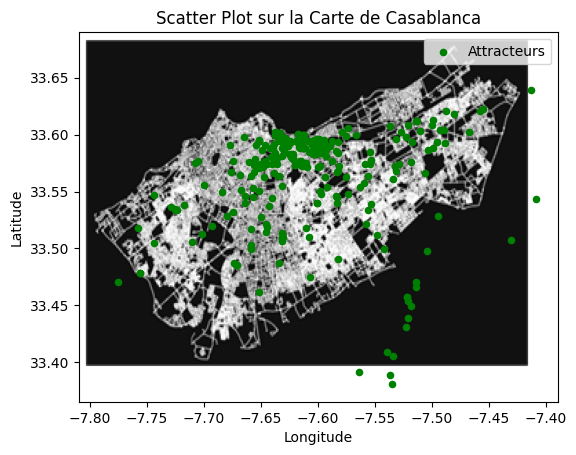

In [47]:
import matplotlib.pyplot as plt
dy = 0.04
dx = -0.01
# Exemple de données de coordonnées (latitude, longitude)
latitudes = [48.8566, 37.7749, 34.0522]
longitudes = [2.3522, -122.4194, -118.2437]

# Création de la carte avec une image de fond (par exemple, de la ville de Paris)
img = plt.imread("casablanca.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-7.80+dx, -7.40+dx, 33.35+dy, 33.65+dy])

# Plotter le scatter plot au-dessus de l'image de la carte
ax.scatter(data.x, data.y, marker='o', label='Attracteurs', s=20, c='green')

# Ajouter des titres, légendes, etc.
ax.set_title('Scatter Plot sur la Carte de Casablanca')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Afficher le graphique
plt.show()


In [25]:
data.head()

,Unnamed: 0,y,x,categ,categories,cluster7,cluster10,cluster15,cluster20
0,0,33.544667,-7.640401,0,SuperMarkets,1.0,4.0,6.0,7.0
1,1,33.594538,-7.595292,0,SuperMarkets,5.0,0.0,1.0,0.0
2,2,33.574692,-7.708105,0,SuperMarkets,2.0,4.0,7.0,17.0
3,3,33.577157,-7.674181,0,SuperMarkets,2.0,4.0,3.0,17.0
4,4,33.587934,-7.639303,0,SuperMarkets,2.0,5.0,11.0,5.0


In [ ]:
data['unique_ID'] = data.apply(lambda row: f"{row.name+1}_{row['categories']}", axis=1)
data.head()
data.to_csv('Attractors.csv')

In [ ]:

def redimensionner_dataframe_vers_nparray(df, n, m):
    # Vérifier que la taille du DataFrame est compatible avec la taille souhaitée
    if len(df) != n * m:
        raise ValueError(f"Le DataFrame doit avoir {n * m} entrées pour être redimensionné en une matrice {n}x{m}.")

    # Initialiser le tableau NumPy de taille nxm
    matrice_nxm = np.zeros((n, m))

    # Copier les valeurs du DataFrame vers le tableau NumPy
    for i in range(n):
        for j in range(m):
            matrice_nxm[i, j] = df.iloc(axis=0)[i * m + j, 0]

    return matrice_nxm
#vvv = redimensionner_dataframe_vers_nparray(distances, 272, 271)
distance_matrix = distances.values.reshape((272, 271))

In [592]:
def ajouter_colonne_diagonale(matrice):
    # Vérifier que la matrice est de taille nxn-1
    n, m = matrice.shape
    if m != n - 1:
        raise ValueError("La matrice doit être de taille nxn-1.")

    # Créer une matrice nxn avec des zéros sur la diagonale
    nouvelle_matrice = np.zeros((n, n))

    # Copier les valeurs de la matrice originale à la nouvelle matrice
    for i in range(n):
        nouvelle_matrice[i, :i] = matrice[i, :i]
        nouvelle_matrice[i, i+1:] = matrice[i, i:]

    return nouvelle_matrice


matrice_transformee = ajouter_colonne_diagonale(distance_matrix)
matrice_transformee

array([[    0.        ,  6938.22466373,  7114.44430077, ...,
         2576.75898263,  2274.14024265,  1503.24247394],
       [ 6938.22466373,     0.        , 10701.46847545, ...,
         8241.51876022,  8819.11635069,  7878.09474549],
       [ 7114.44430077, 10701.46847545,     0.        , ...,
         4630.63723638,  5621.85208139,  5784.48753519],
       ...,
       [ 2576.75898263,  8241.51876022,  4630.63723638, ...,
            0.        ,  1259.90544392,  1155.07741713],
       [ 2274.14024265,  8819.11635069,  5621.85208139, ...,
         1259.90544392,     0.        ,   941.85165525],
       [ 1503.24247394,  7878.09474549,  5784.48753519, ...,
         1155.07741713,   941.85165525,     0.        ]])

In [593]:
dist_matrix_km = matrice_transformee/1000
dist_matrix_km

array([[ 0.        ,  6.93822466,  7.1144443 , ...,  2.57675898,
         2.27414024,  1.50324247],
       [ 6.93822466,  0.        , 10.70146848, ...,  8.24151876,
         8.81911635,  7.87809475],
       [ 7.1144443 , 10.70146848,  0.        , ...,  4.63063724,
         5.62185208,  5.78448754],
       ...,
       [ 2.57675898,  8.24151876,  4.63063724, ...,  0.        ,
         1.25990544,  1.15507742],
       [ 2.27414024,  8.81911635,  5.62185208, ...,  1.25990544,
         0.        ,  0.94185166],
       [ 1.50324247,  7.87809475,  5.78448754, ...,  1.15507742,
         0.94185166,  0.        ]])

### Des Tests simples

In [159]:
resum = resumer(dt2, 1)
resum.head()

<class 'geopy.distance.geodesic'>
(array([  0, 192], dtype=int64),)  DONE


,x,y,categ,distance,indices_proximite,effectif_par_type,SuperMarkets,ATMs,Fuel_Stations,Gares_stations,Universités,tot_voisinage
0,-7.640401,33.544667,0,"[0.0, 0.8537503852488646]","[0, 192]","{0: 1, 1: 0, 2: 1, 3: 0, 4: 0}",1,0,1,0,0,1
1,-7.595292,33.594538,0,"[0.0, 0.4923812009163862, 0.9170802527208395, ...","[1, 34, 48, 63, 86, 89, 126, 127, 128, 149, 15...","{0: 6, 1: 3, 2: 12, 3: 1, 4: 0}",6,3,12,1,0,21
2,-7.708105,33.574692,0,"[0.0, 0.3113080893677184]","[2, 146]","{0: 1, 1: 1, 2: 0, 3: 0, 4: 0}",1,1,0,0,0,1
3,-7.674181,33.577157,0,[0.0],[3],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}",1,0,0,0,0,0
4,-7.639303,33.587934,0,"[0.0, 0.7144321429471595, 0.8735301768192388, ...","[4, 6, 10, 12, 21, 30, 40, 61, 102, 106, 113, ...","{0: 10, 1: 2, 2: 1, 3: 1, 4: 0}",10,2,1,1,0,13


<Axes: xlabel='x', ylabel='y'>

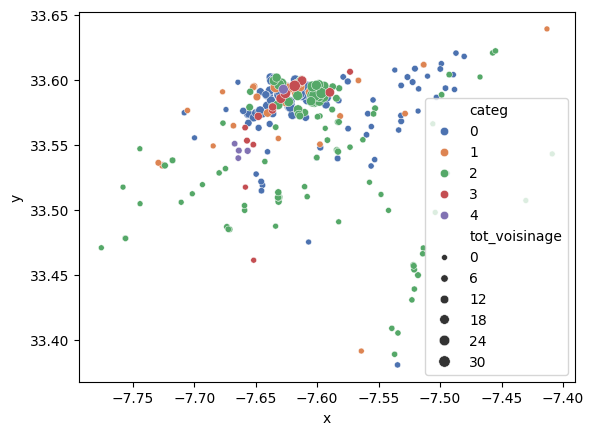

In [167]:
sns.scatterplot(data=resum, x="x", y="y",
                hue='categ', 
                size='tot_voisinage',
                palette="deep"
               )

In [169]:


resum['categories'] = resum.categ.apply(lambda x: dict_categ[x])


resum.head()

,x,y,categ,distance,indices_proximite,effectif_par_type,SuperMarkets,ATMs,Fuel_Stations,Gares_stations,Universités,tot_voisinage,categories
0,-7.640401,33.544667,0,"[0.0, 0.8537503852488646]","[0, 192]","{0: 1, 1: 0, 2: 1, 3: 0, 4: 0}",1,0,1,0,0,1,SuperMarkets
1,-7.595292,33.594538,0,"[0.0, 0.4923812009163862, 0.9170802527208395, ...","[1, 34, 48, 63, 86, 89, 126, 127, 128, 149, 15...","{0: 6, 1: 3, 2: 12, 3: 1, 4: 0}",6,3,12,1,0,21,SuperMarkets
2,-7.708105,33.574692,0,"[0.0, 0.3113080893677184]","[2, 146]","{0: 1, 1: 1, 2: 0, 3: 0, 4: 0}",1,1,0,0,0,1,SuperMarkets
3,-7.674181,33.577157,0,[0.0],[3],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}",1,0,0,0,0,0,SuperMarkets
4,-7.639303,33.587934,0,"[0.0, 0.7144321429471595, 0.8735301768192388, ...","[4, 6, 10, 12, 21, 30, 40, 61, 102, 106, 113, ...","{0: 10, 1: 2, 2: 1, 3: 1, 4: 0}",10,2,1,1,0,13,SuperMarkets


In [81]:
dict_categ = {
    0:'SuperMarket',
    1:'ATM',
    2:'Fuel_Station',
    3:'Gares_station',
    4:'University',
}

<Axes: xlabel='x', ylabel='y'>

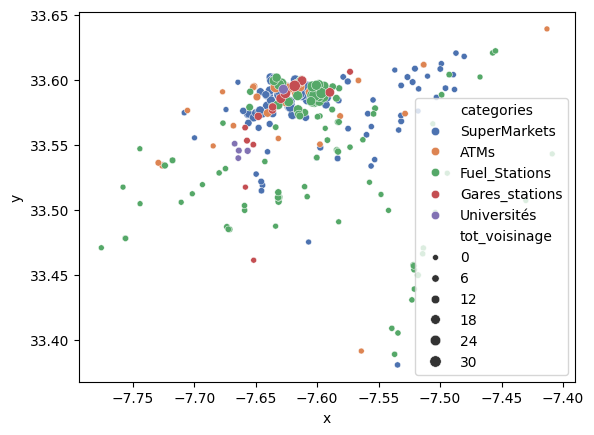

In [170]:
sns.scatterplot(data=resum, x="x", y="y",
                hue='categories', 
                size='tot_voisinage',
                palette="deep"
               )

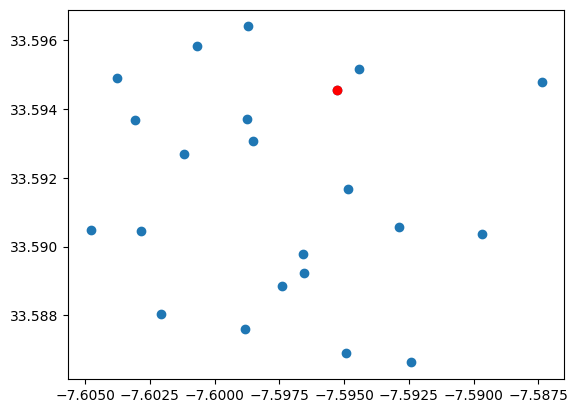

In [191]:
list_index = np.ravel(resum.loc[[1]].indices_proximite.values[0]).tolist()

plt.scatter(resum.loc[list_index].x, resum.loc[list_index].y)
plt.scatter(resum.loc[[1]].x, resum.loc[[1]].y, c='red')

#list_index

# Implémentations 2

In [28]:
data = data_copy
d_clusters = data
d_clusters.head(3)

,Unnamed: 0,y,x,categ,categories,cluster7,cluster10,cluster15,cluster20
0,0,33.544667,-7.640401,0,SuperMarkets,1.0,4.0,6.0,7.0
1,1,33.594538,-7.595292,0,SuperMarkets,5.0,0.0,1.0,0.0
2,2,33.574692,-7.708105,0,SuperMarkets,2.0,4.0,7.0,17.0


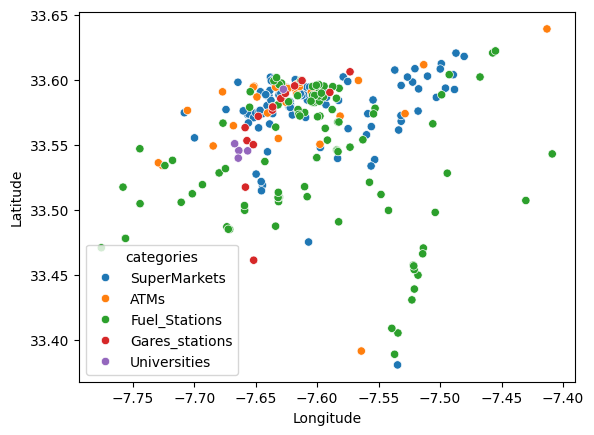

In [16]:
import seaborn as sns
sns.scatterplot(data=data, x=data.x, y=data.y, hue=data['categories'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Attracteur.png')

<Figure size 640x480 with 0 Axes>

## seven (7) Classes

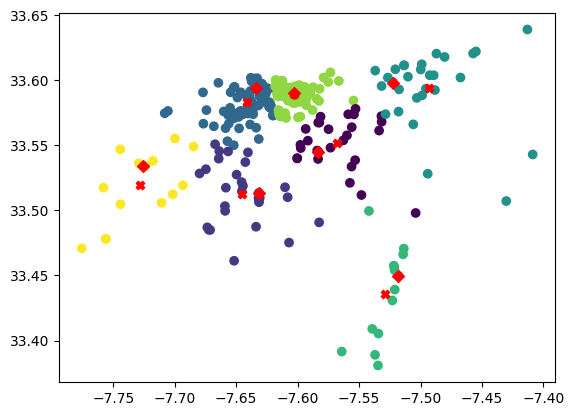

In [448]:
plt.scatter(data.x, data.y, c=data['cluster7'])
plt.scatter(centers7[:,1], centers7[:,0], c='red', marker='X')
plt.scatter(choix7[:,0], choix7[:,1], c='red', marker='D')

In [22]:
def calculer_centroides(df, clusterX='cluster7'):
    # Regroupement par cluster et calcul des moyennes
    centroides_df = df.groupby(clusterX)[['x', 'y']].mean().reset_index()

    # Création d'une matrice NumPy à partir des moyennes
    centroides = centroides_df[['x', 'y']].to_numpy()

    return centroides, centroides_df

In [27]:
centers10 = calculer_centroides(data, 'cluster10')

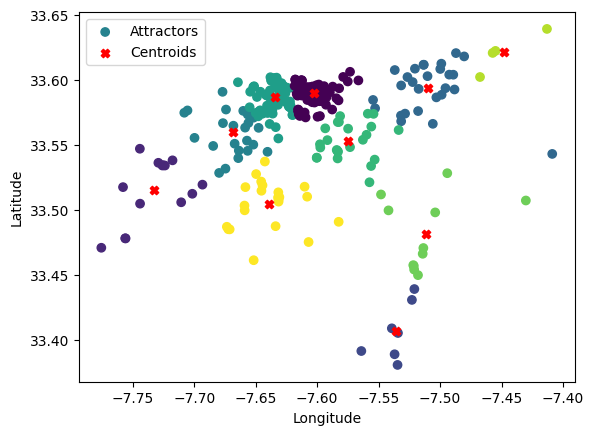

In [33]:
plt.scatter(data.x, data.y, c=data['cluster10'], label='Attractors')
plt.scatter(centers10[:,0], centers10[:,1], c='red', marker='X', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

### Classe One (1)

In [60]:
centers7 = calculer_centroides(data, 'cluster7')

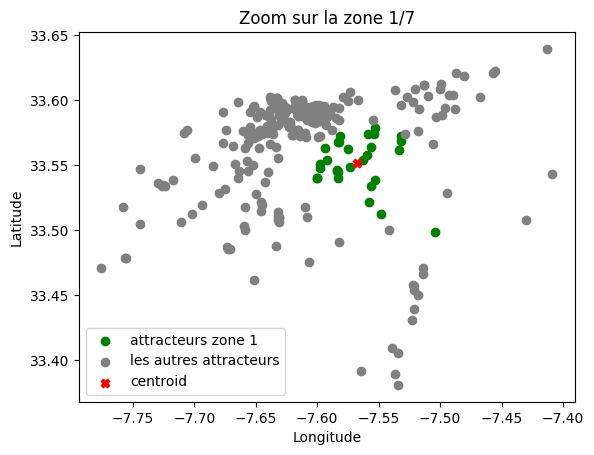

In [61]:
num_zone = 0
plot_One_class(data, 'cluster7', num_zone=num_zone)
plt.scatter(centers7[num_zone,0], centers7[num_zone,1], c='red', marker='X', label='centroid')
plt.legend()

In [86]:
resum7_class0 = resumer(d_clusters[d_clusters.cluster7==num_zone].reset_index(drop=True), 1.5)

C:\Users\pc\AppData\Local\Temp\ipykernel_20624\2659122888.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voisinage_info'] = voisinage_infos


In [87]:
resum7_class0.head(2)

,x,y,categ,categories,distance,indices_proximite,effectif_par_type,SuperMarkets,ATMs,Fuel_Stations,tot_voisinage
0,-7.555968,33.564033,0,SuperMarkets,"[0.0, 0.7857360723444511, 1.130778999034559, 1...","[0, 1, 10, 19, 24]","{0: 3, 1: 0, 2: 2}",3,0,2,4
1,-7.559864,33.557744,0,SuperMarkets,"[0.7857360723444511, 0.0, 1.4855955280011184, ...","[0, 1, 11, 19]","{0: 3, 1: 0, 2: 1}",3,0,1,3


In [88]:
dtt, li, xy = df_resum_et_classement(df=resum7_class0, centersX=centers7, num_cluster=num_zone, alpha_1=0.5, alpha_2=0.5, rang=1)
dtt.head(3)

,x,y,categ,categories,distance,indices_proximite,effectif_par_type,SuperMarkets,ATMs,Fuel_Stations,tot_voisinage,a_1,a_2,a_3,classement
16,-7.583554,33.545409,2,Fuel_Stations,"[1.3205539758596676, 0.6482322350919564, 1.431...","[3, 4, 13, 15, 16, 18, 22, 27]","{0: 2, 1: 1, 2: 5}",2,1,5,7,6289.922924,0.0,0.999696,0.499848
15,-7.584093,33.546064,2,Fuel_Stations,"[1.25753885623765, 0.7237085203063549, 1.35745...","[3, 4, 13, 15, 16, 18, 22, 27]","{0: 2, 1: 1, 2: 5}",2,1,5,7,6290.007355,0.0,0.999709,0.499855
3,-7.597444,33.547955,0,SuperMarkets,"[0.0, 0.9190110101885125, 0.27807290582425437,...","[3, 5, 13, 15, 16, 22, 25, 27]","{0: 2, 1: 1, 2: 5}",2,1,5,7,6291.108148,0.0,0.999884,0.499942


In [71]:
dtt.loc[3][['x', 'y', 'categories']]

x                -7.597444
y                33.547955
categories    SuperMarkets
Name: 3, dtype: object

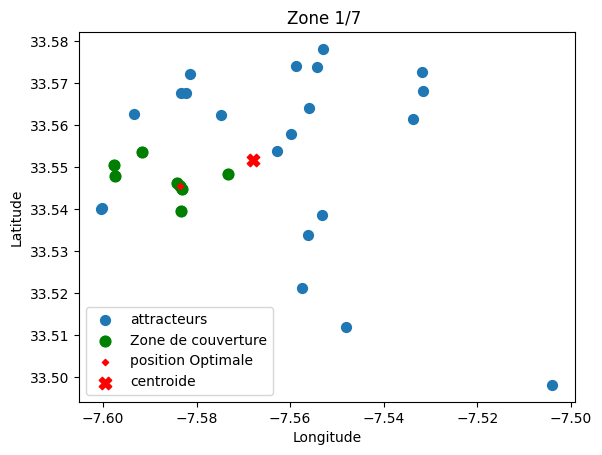

In [89]:
plot_attractors_coverage(dtt, xy, centersX=centers7,list_a=li, num_zone=num_zone, max_zones=7)
plt.savefig('couverture.png')

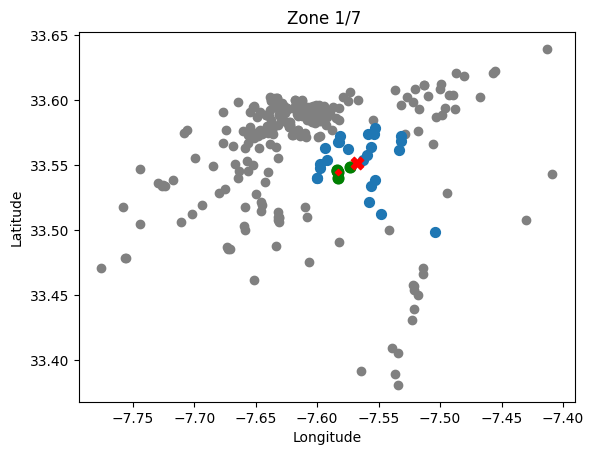

In [84]:
num_zone = 0
plot_One_class(data, 'cluster7', num_zone=num_zone)
plt.scatter(centers7[num_zone,0], centers7[num_zone,1], c='red', marker='X', label='centroid')
plot_attractors_coverage(dtt, xy, centersX=centers7,list_a=li, num_zone=num_zone, max_zones=7)
#plt.legend()
plt.legend().set_visible(False)

In [622]:
def resumer_et_choix_PLs(data, clusterX='cluster7', centersX=centers7, covered_dist=1, alpha_1=1, alpha_2=1):
    choix = np.zeros((len(data[clusterX].unique()), 2))
    dict_indexs ={}
    for i in data[clusterX].unique():
        resum = resumer(data[data[clusterX]==i].reset_index(drop=True), covered_dist)
        df_classement, index_voisins, xy_choix = df_resum_et_classement(df=resum, centersX=centersX, num_cluster=int(i), alpha_1=alpha_1, alpha_2=alpha_2, rang=1)
        choix[int(i)][0] = xy_choix[0]
        choix[int(i)][1] = xy_choix[1]
        dict_indexs[i] = index_voisins

    return choix, dict_indexs   

In [90]:
choix7, indices7 = resumer_et_choix_PLs(data, 'cluster7', 'centers7', covered_dist=1.5, alpha_1=0.5, alpha_2=0.5`  m)

TypeError: resumer_et_choix_PLs() missing 2 required positional arguments: 'clusterX' and 'centersX'

In [610]:
choix7

array([[-7.5830327, 33.5447978],
       [-7.6316073, 33.5134999],
       [-7.6337971, 33.5943551],
       [-7.5223526, 33.5982648],
       [-7.5179838, 33.4498437],
       [-7.6028211, 33.5904553],
       [-7.7258915, 33.5341286]])

In [ ]:
indices7

## Ten (10) Classes

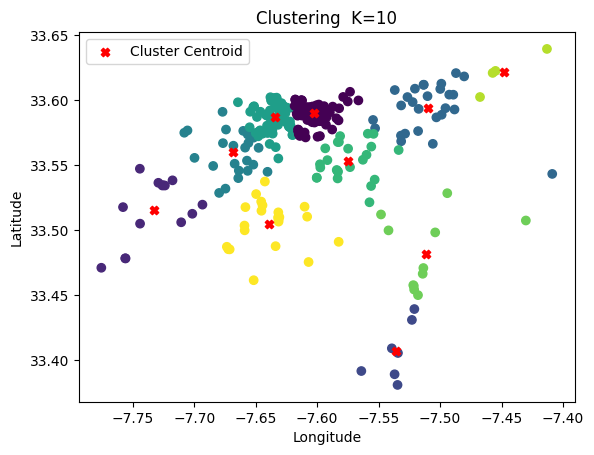

In [130]:
plt.scatter(data.x, data.y, c=data['cluster10'])
plt.scatter(centers10[:,0], centers10[:,1], c='red', marker='X', label='Cluster Centroid')
#plt.scatter(choix10[:,0], choix10[:,1], c='red', marker='D')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering  K=10')
plt.legend()
plt.savefig('Cluster10results.png')

### Classe 0 / Zone 1

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

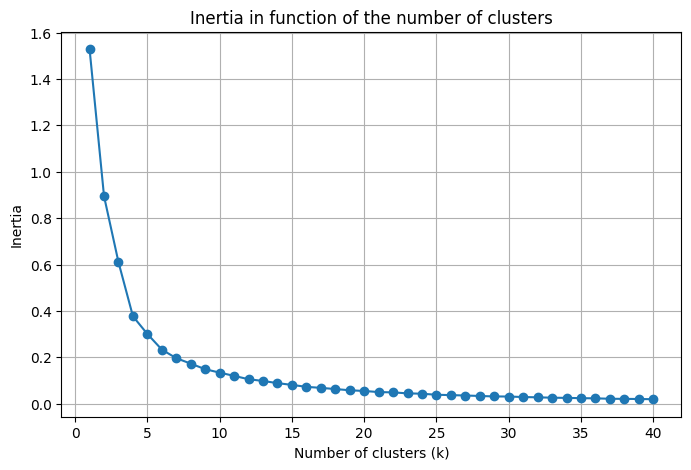

In [99]:
# Exemple de données (remplacez cela par vos propres données)
X = data[['x', 'y']]

# Liste pour stocker les valeurs de l'inertie
inertie = []

# Tester différentes valeurs de k
for k in range(1, 41):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertie.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 41), inertie, marker='o')
plt.title('Inertia in function of the number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show
plt.savefig('Inertia.png')

In [ ]:
!pip install geopandas

In [54]:
data.head()

,Unnamed: 0,y,x,categ,categories,cluster7,cluster10,cluster15,cluster20
0,0,33.544667,-7.640401,0,SuperMarkets,1.0,4.0,6.0,7.0
1,1,33.594538,-7.595292,0,SuperMarkets,5.0,0.0,1.0,0.0
2,2,33.574692,-7.708105,0,SuperMarkets,2.0,4.0,7.0,17.0
3,3,33.577157,-7.674181,0,SuperMarkets,2.0,4.0,3.0,17.0
4,4,33.587934,-7.639303,0,SuperMarkets,2.0,5.0,11.0,5.0


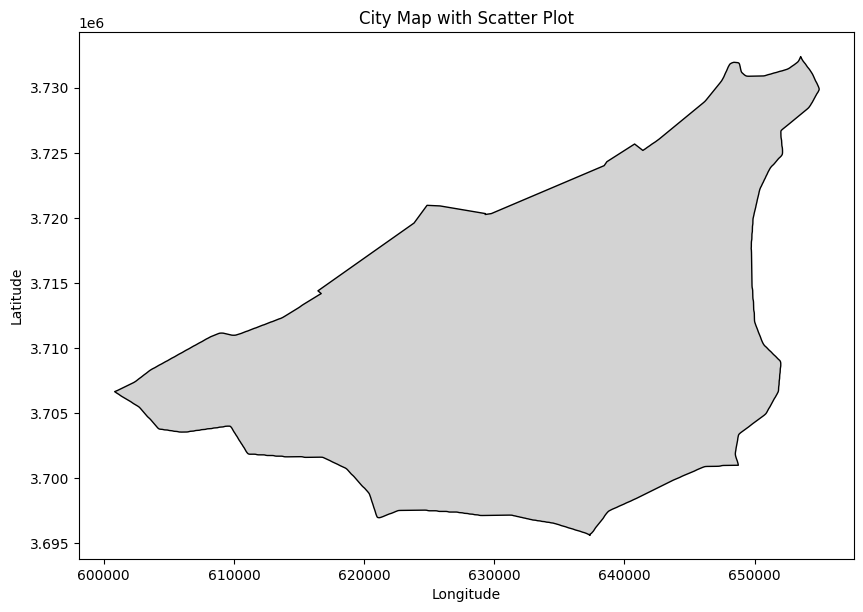

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the shapefile of the city
shapefile_path = 'casa_shapefile/casa2/shapefile/Casablanca_studyarea.shp'
city_map = gpd.read_file(shapefile_path)

# Step 2: Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
city_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Step 3: Create and overlay a scatter plot
# Assuming you have some sample data for scatter plot (replace with your own data)
scatter_data = data

#scatter_df = gpd.GeoDataFrame(scatter_data, geometry=gpd.points_from_xy(scatter_data['y'], scatter_data['x']))

# Plot the scatter plot on top of the shapefile map
#scatter_df.plot(ax=ax, color='red', marker='o')

# Customize the plot (add labels, title, etc.)
plt.title('City Map with Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [32]:
city_map

,geometry
0,"POLYGON ((654460.379 3730974.215, 654640.014 3..."


In [106]:
num_zone = 0
plot_One_class(data, 'cluster10', num_zone=num_zone, couleur='blue')
plt.scatter(centers10[num_zone,0], centers10[num_zone,1], c='red', marker='X')
#plt.savefig('im2.png')

KeyError: 'cluster10'

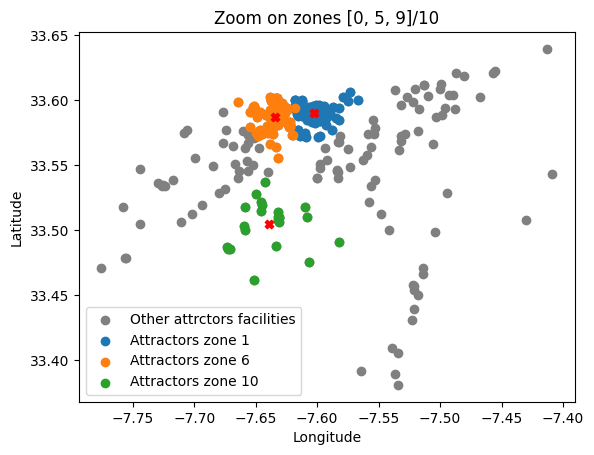

In [212]:
plot_Multiple_class(data, 'cluster10')
plt.scatter(centers10[0,0], centers10[0,1], c='red', marker='X')
plt.scatter(centers10[5,0], centers10[5,1], c='red', marker='X')
plt.scatter(centers10[9,0], centers10[9,1], c='red', marker='X')
plt.savefig('attractorsfromripleyanalysis.png')

In [123]:
resum10_class0 = resumer(d_clusters[d_clusters.cluster10==num_zone].reset_index(drop=True), 0.7)

C:\Users\pc\AppData\Local\Temp\ipykernel_4908\2659122888.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voisinage_info'] = voisinage_infos


In [124]:
dtt10_0, li10_0, xy10_0 = df_resum_et_classement(df=resum10_class0, centersX=centers10, num_cluster=num_zone, alpha_1=0.5, alpha_2=0.5, rang=1)
dtt2, li2, xy2 = df_resum_et_classement(df=resum10_class0, centersX=centers10, num_cluster=num_zone, alpha_1=1, alpha_2=1, rang=7)
dtt10_0.head()

,x,y,categ,categories,distance,indices_proximite,effectif_par_type,SuperMarket,ATM,Fuel_Station,Gares_station,tot_voisinage,a_1,a_2,a_3,classement,rank
41,-7.596542,33.589230,2,Fuel_Stations,"[0.6001254154103566, 0.6281009562191895, 0.370...","[0, 2, 7, 10, 13, 18, 19, 21, 22, 33, 40, 41, ...","{0: 9, 1: 1, 2: 10, 3: 1}",9,1,10,1,20,6299.557220,0.00,0.999634,0.499817,1
48,-7.598817,33.587608,2,Fuel_Stations,"[0.49227216942219065, 0.6409278793481736, 0.60...","[2, 7, 10, 13, 18, 19, 21, 22, 33, 35, 40, 41,...","{0: 8, 1: 2, 2: 10, 3: 0}",8,2,10,0,19,6299.610414,0.05,0.999643,0.524821,2
18,-7.601179,33.592684,0,SuperMarkets,"[0.5839239192641307, 0.0, 0.678115790969163, 0...","[0, 18, 19, 20, 21, 22, 33, 34, 35, 40, 41, 42...","{0: 6, 1: 3, 2: 11, 3: 0}",6,3,11,0,19,6300.132620,0.05,0.999726,0.524863,3
43,-7.597388,33.588843,2,Fuel_Stations,"[0.6610066904229523, 0.5894242866765073, 0.459...","[0, 2, 7, 10, 13, 18, 19, 21, 22, 33, 40, 41, ...","{0: 9, 1: 1, 2: 9, 3: 0}",9,1,9,0,18,6299.591927,0.10,0.999640,0.549820,4
59,-7.596572,33.589771,2,Fuel_Stations,"[0.5419167439615268, 0.6881544553986819, 0.352...","[0, 2, 7, 10, 13, 18, 21, 22, 33, 40, 41, 42, ...","{0: 8, 1: 1, 2: 9, 3: 1}",8,1,9,1,18,6299.596864,0.10,0.999641,0.549820,5


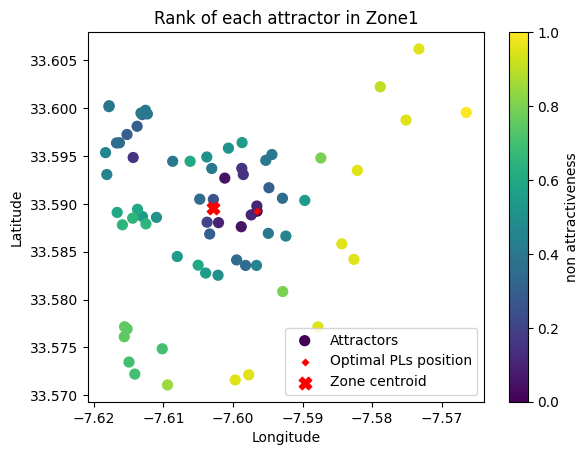

In [125]:
plot_classement_coverage(dtt10_0, xy10_0, centersX=centers10, num_zone=num_zone)
plt.savefig('z1rank0.7.png')

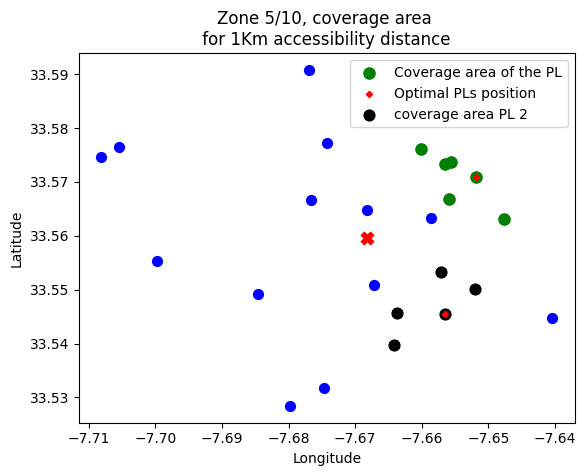

In [87]:
dtt10_0, li10_0, xy10_0 = df_resum_et_classement(df=resum10_class0, centersX=centers10, num_cluster=num_zone, alpha_1=0.5, alpha_2=0.5, rang=1)
dtt2, li2, xy2 = df_resum_et_classement(df=resum10_class0, centersX=centers10, num_cluster=num_zone, alpha_1=0.5, alpha_2=0.5, rang=3)
dtt3, li3, xy3 = df_resum_et_classement(df=resum10_class0, centersX=centers10, num_cluster=num_zone, alpha_1=0.5, alpha_2=0.5, rang=1)

plot_attractors_coverage(dtt10_0, xy10_0, centersX=centers10, list_a=li10_0, num_zone=num_zone, max_zones=10)
plot_attractors_coverage2(dtt2, xy2, centersX=centers10, list_a=li2, num_zone=num_zone, max_zones=10, couleur='k', rang=2)
#plot_attractors_coverage2(dtt3, xy3, centersX=centers10, list_a=li3, num_zone=num_zone, max_zones=10, couleur='grey')
plt.savefig('coveragezone5.png')
#plt.scatter(centers10[num_zone,1], centers10[num_zone,0], c='red', marker='X')

In [86]:


classement = dtt10_0[['categories', 'x', 'y', 'indices_proximite', 'SuperMarket', 'ATM', 'Fuel_Station', 'Gares_station', 'University','tot_voisinage', 'rank']]
classement.head()

,categories,x,y,indices_proximite,SuperMarket,ATM,Fuel_Station,Gares_station,University,tot_voisinage,rank
5,SuperMarkets,-7.651791,33.570885,"[3, 4, 5, 7, 8, 9]",6,0,0,0,0,5,1
8,SuperMarkets,-7.655963,33.566818,"[3, 4, 5, 8, 9, 18]",5,0,0,1,0,5,2
23,Universités,-7.656563,33.545402,"[17, 19, 20, 22, 23]",0,0,0,2,3,4,3
4,SuperMarkets,-7.655616,33.573741,"[3, 4, 5, 7, 8]",5,0,0,0,0,4,4
3,SuperMarkets,-7.656496,33.573321,"[3, 4, 5, 7, 8]",5,0,0,0,0,4,5


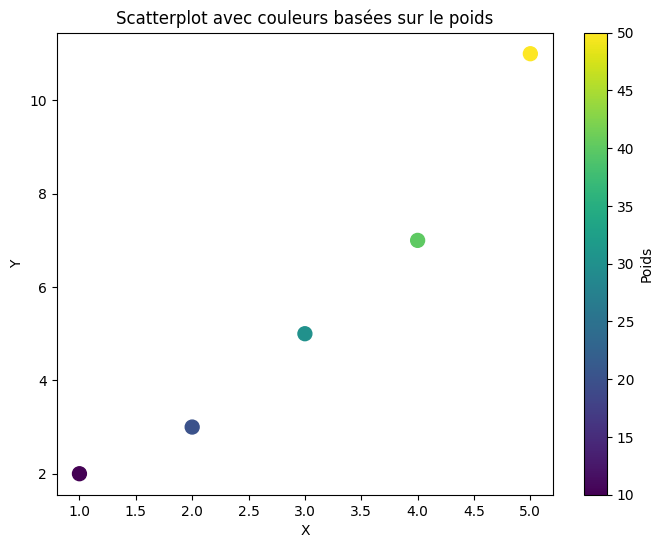

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre DataFrame s'appelle df
# Assurez-vous d'avoir installé les bibliothèques nécessaires en utilisant pip install matplotlib seaborn pandas

# Exemple de données
import pandas as pd

data = {'x': [1, 2, 3, 4, 5],
        'y': [2, 3, 5, 7, 11],
        'poids': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)

# Créer le scatterplot avec le colormap basé sur la colonne 'poids'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=df['x'], y=df['y'], c=df['poids'], cmap='viridis', s=100)

# Ajouter une barre de couleur
plt.colorbar(scatter, label='Poids')

# Ajouter des labels et un titre
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot avec couleurs basées sur le poids')

# Afficher le plot
plt.show()


le rang de cette image est : 2
le rang de cette image est : 7
le rang de cette image est : 12
le rang de cette image est : 17
le rang de cette image est : 22
le rang de cette image est : 27
le rang de cette image est : 32
le rang de cette image est : 37
le rang de cette image est : 42
le rang de cette image est : 47


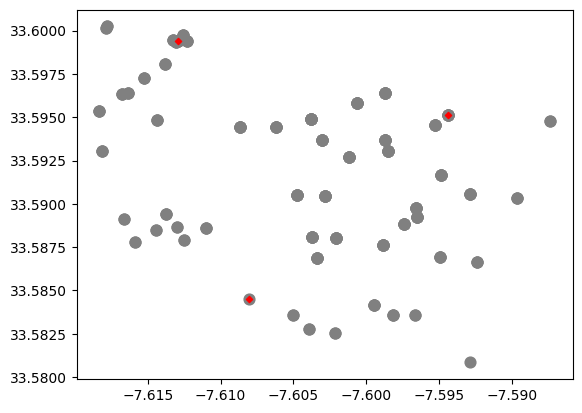

In [225]:
for i in range(2, 50, 5):
    print('le rang de cette image est :', i)
    dtt3, li3, xy3 = df_resum_et_classement(df=resum10_class0, centersX=centers10, num_cluster=num_zone, alpha_1=0.5, alpha_2=0.5, rang=i)
    plot_attractors_coverage2(dtt3, xy3, centersX=centers10, list_a=li3, num_zone=num_zone, max_zones=10, couleur='grey')


In [135]:
choix10 = resumer_et_choix_PLs(data, 'cluster10', centersX=centers10, covered_dist=1, alpha_1=0.5, alpha_2=0.5)

C:\Users\pc\AppData\Local\Temp\ipykernel_20624\2659122888.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voisinage_info'] = voisinage_infos
C:\Users\pc\AppData\Local\Temp\ipykernel_20624\2659122888.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voisinage_info'] = voisinage_infos
C:\Users\pc\AppData\Local\Temp\ipykernel_20624\2659122888.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [136]:
choix10

array([[-7.6028211, 33.5904553],
       [-7.7238849, 33.5341064],
       [-7.5346227, 33.3808071],
       [-7.5223526, 33.5982648],
       [-7.6517909, 33.5708852],
       [-7.6337971, 33.5943551],
       [-7.5830327, 33.5447978],
       [-7.5179838, 33.4498437],
       [-7.4549535, 33.6222385],
       [-7.6314093, 33.5063539]])

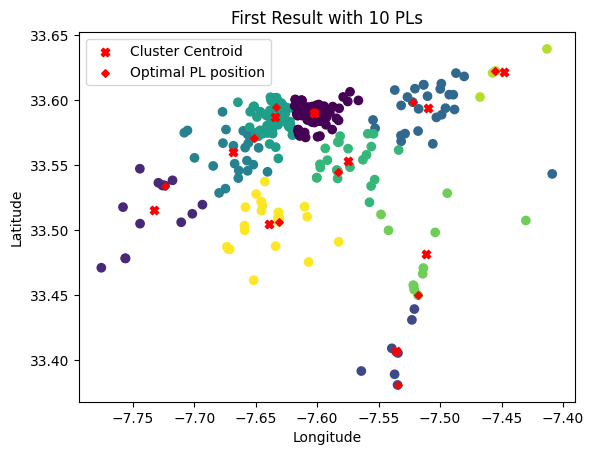

In [140]:
plt.scatter(data.x, data.y, c=data['cluster10'])
plt.scatter(centers10[:,0], centers10[:,1], c='red', marker='X', label='Cluster Centroid')
plt.scatter(choix10[:,0], choix10[:,1], c='red', marker='D', label='Optimal PL position', s=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('First Result with 10 PLs')
plt.legend()
plt.savefig('OptimalPLposition.png')

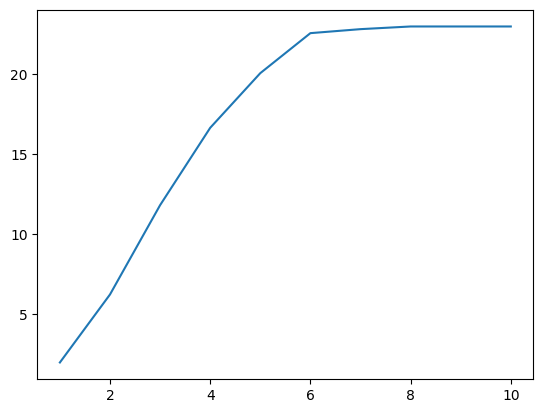

In [169]:
from statistics import mean
def k_ripley(df, distance_matrix, R_distance):
    
    Dist = distance_matrix
    R = R_distance
    K_ripley_list = []
    
    for i in range(len(df)):
        count = 0
        for j in range(len(df)):
            if i != j:
                if Dist[i, j] <= R :
                    count += 1
        K_ripley_list.append(count)
    K_ripley = mean(K_ripley_list)
    
    return K_ripley

ilist = []
mylist = []
for i in range(1, 11):
    ilist.append(i)
    mylist.append(k_ripley(d5[['x','y']], distance_matrix=Dist, R_distance=i))

plt.plot(ilist, mylist)

In [145]:
np.zeros_like(Dist, dtype=float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Clustering Implementations

In [4]:
dt2 = pd.read_csv('ALL_Attractives_with_cluster.csv')
dt2 = dt2[['y', 'x', 'categ', 'cluster']]
dt2.head()

,y,x,categ,cluster
0,33.544667,-7.640401,0,3.0
1,33.594538,-7.595292,0,5.0
2,33.574692,-7.708105,0,2.0
3,33.577157,-7.674181,0,2.0
4,33.587934,-7.639303,0,2.0


In [130]:
all_data = pd.read_csv('Data_saved/all_true_df_attractors.csv')
all_data['KMcluster10'], KMcenters10 =  kmeans_custom_init(all_data[['y','x']], 10, graph)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


point :  0  Assigned  itération : 1 / 1
point :  1  Assigned  itération : 1 / 1
point :  2  Assigned  itération : 1 / 1
point :  3  Assigned  itération : 1 / 1
point :  4  Assigned  itération : 1 / 1
point :  5  Assigned  itération : 1 / 1
point :  6  Assigned  itération : 1 / 1
point :  7  Assigned  itération : 1 / 1
point :  8  Assigned  itération : 1 / 1
point :  9  Assigned  itération : 1 / 1
point :  10  Assigned  itération : 1 / 1
point :  11  Assigned  itération : 1 / 1
point :  12  Assigned  itération : 1 / 1
point :  13  Assigned  itération : 1 / 1
point :  14  Assigned  itération : 1 / 1
point :  15  Assigned  itération : 1 / 1
point :  16  Assigned  itération : 1 / 1
point :  17  Assigned  itération : 1 / 1
point :  18  Assigned  itération : 1 / 1
point :  19  Assigned  itération : 1 / 1
point :  20  Assigned  itération : 1 / 1
point :  21  Assigned  itération : 1 / 1
point :  22  Assigned  itération : 1 / 1
point :  23  Assigned  itération : 1 / 1
point :  24  Assigned  ité

In [131]:
all_data.to_csv('Data_saved/all_df_attractors_with_cluster.csv')

In [192]:
data = resum[['y', 'x', 'categ', 'categories']]
data['cluster7'], centers7 =  kmeans_custom_init(dt2[['y','x']], 7, graph)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


point :  0  Assigned  itération : 1 / 1
point :  1  Assigned  itération : 1 / 1
point :  2  Assigned  itération : 1 / 1
point :  3  Assigned  itération : 1 / 1
point :  4  Assigned  itération : 1 / 1
point :  5  Assigned  itération : 1 / 1
point :  6  Assigned  itération : 1 / 1
point :  7  Assigned  itération : 1 / 1
point :  8  Assigned  itération : 1 / 1
point :  9  Assigned  itération : 1 / 1
point :  10  Assigned  itération : 1 / 1
point :  11  Assigned  itération : 1 / 1
point :  12  Assigned  itération : 1 / 1
point :  13  Assigned  itération : 1 / 1
point :  14  Assigned  itération : 1 / 1
point :  15  Assigned  itération : 1 / 1
point :  16  Assigned  itération : 1 / 1
point :  17  Assigned  itération : 1 / 1
point :  18  Assigned  itération : 1 / 1
point :  19  Assigned  itération : 1 / 1
point :  20  Assigned  itération : 1 / 1
point :  21  Assigned  itération : 1 / 1
point :  22  Assigned  itération : 1 / 1
point :  23  Assigned  itération : 1 / 1
point :  24  Assigned  ité

C:\Users\pc\AppData\Local\Temp\ipykernel_19680\471657075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster7'], centers7 =  kmeans_custom_init(dt2[['y','x']], 7, graph)


In [193]:
data['cluster10'], centers10 =  kmeans_custom_init(dt2[['y','x']], 10, graph)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


point :  0  Assigned  itération : 1 / 1
point :  1  Assigned  itération : 1 / 1
point :  2  Assigned  itération : 1 / 1
point :  3  Assigned  itération : 1 / 1
point :  4  Assigned  itération : 1 / 1
point :  5  Assigned  itération : 1 / 1
point :  6  Assigned  itération : 1 / 1
point :  7  Assigned  itération : 1 / 1
point :  8  Assigned  itération : 1 / 1
point :  9  Assigned  itération : 1 / 1
point :  10  Assigned  itération : 1 / 1
point :  11  Assigned  itération : 1 / 1
point :  12  Assigned  itération : 1 / 1
point :  13  Assigned  itération : 1 / 1
point :  14  Assigned  itération : 1 / 1
point :  15  Assigned  itération : 1 / 1
point :  16  Assigned  itération : 1 / 1
point :  17  Assigned  itération : 1 / 1
point :  18  Assigned  itération : 1 / 1
point :  19  Assigned  itération : 1 / 1
point :  20  Assigned  itération : 1 / 1
point :  21  Assigned  itération : 1 / 1
point :  22  Assigned  itération : 1 / 1
point :  23  Assigned  itération : 1 / 1
point :  24  Assigned  ité

C:\Users\pc\AppData\Local\Temp\ipykernel_19680\344359182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster10'], centers10 =  kmeans_custom_init(dt2[['y','x']], 10, graph)


In [194]:
data['cluster15'], centers15 =  kmeans_custom_init(dt2[['y','x']], 15, graph)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


point :  0  Assigned  itération : 1 / 1
point :  1  Assigned  itération : 1 / 1
point :  2  Assigned  itération : 1 / 1
point :  3  Assigned  itération : 1 / 1
point :  4  Assigned  itération : 1 / 1
point :  5  Assigned  itération : 1 / 1
point :  6  Assigned  itération : 1 / 1
point :  7  Assigned  itération : 1 / 1
point :  8  Assigned  itération : 1 / 1
point :  9  Assigned  itération : 1 / 1
point :  10  Assigned  itération : 1 / 1
point :  11  Assigned  itération : 1 / 1
point :  12  Assigned  itération : 1 / 1
point :  13  Assigned  itération : 1 / 1
point :  14  Assigned  itération : 1 / 1
point :  15  Assigned  itération : 1 / 1
point :  16  Assigned  itération : 1 / 1
point :  17  Assigned  itération : 1 / 1
point :  18  Assigned  itération : 1 / 1
point :  19  Assigned  itération : 1 / 1
point :  20  Assigned  itération : 1 / 1
point :  21  Assigned  itération : 1 / 1
point :  22  Assigned  itération : 1 / 1
point :  23  Assigned  itération : 1 / 1
point :  24  Assigned  ité

C:\Users\pc\AppData\Local\Temp\ipykernel_19680\2465047608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster15'], centers15 =  kmeans_custom_init(dt2[['y','x']], 15, graph)


In [195]:
data['cluster20'], centers =  kmeans_custom_init(dt2[['y','x']], 20, graph)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


point :  0  Assigned  itération : 1 / 1
point :  1  Assigned  itération : 1 / 1
point :  2  Assigned  itération : 1 / 1
point :  3  Assigned  itération : 1 / 1
point :  4  Assigned  itération : 1 / 1
point :  5  Assigned  itération : 1 / 1
point :  6  Assigned  itération : 1 / 1
point :  7  Assigned  itération : 1 / 1
point :  8  Assigned  itération : 1 / 1
point :  9  Assigned  itération : 1 / 1
point :  10  Assigned  itération : 1 / 1
point :  11  Assigned  itération : 1 / 1
point :  12  Assigned  itération : 1 / 1
point :  13  Assigned  itération : 1 / 1
point :  14  Assigned  itération : 1 / 1
point :  15  Assigned  itération : 1 / 1
point :  16  Assigned  itération : 1 / 1
point :  17  Assigned  itération : 1 / 1
point :  18  Assigned  itération : 1 / 1
point :  19  Assigned  itération : 1 / 1
point :  20  Assigned  itération : 1 / 1
point :  21  Assigned  itération : 1 / 1
point :  22  Assigned  itération : 1 / 1
point :  23  Assigned  itération : 1 / 1
point :  24  Assigned  ité

C:\Users\pc\AppData\Local\Temp\ipykernel_19680\987838895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster20'], centers =  kmeans_custom_init(dt2[['y','x']], 20, graph)


In [196]:
data.head()

,y,x,categ,categories,cluster7,cluster10,cluster15,cluster20
0,33.544667,-7.640401,0,SuperMarkets,1.0,4.0,6.0,7.0
1,33.594538,-7.595292,0,SuperMarkets,5.0,0.0,1.0,0.0
2,33.574692,-7.708105,0,SuperMarkets,2.0,4.0,7.0,17.0
3,33.577157,-7.674181,0,SuperMarkets,2.0,4.0,3.0,17.0
4,33.587934,-7.639303,0,SuperMarkets,2.0,5.0,11.0,5.0


In [197]:
data.to_csv('Data_saved/points_by_clusters.csv')

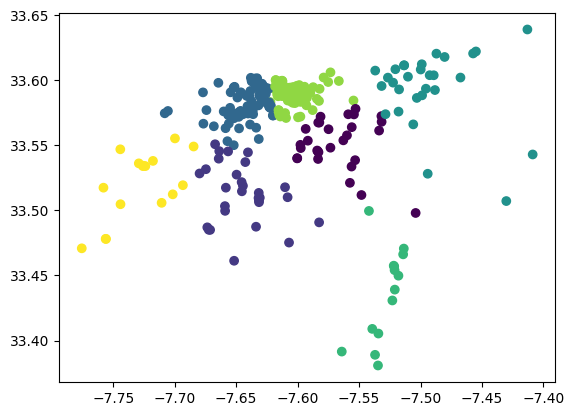

In [199]:
plt.scatter(data.x, data.y, c=data['cluster7'])

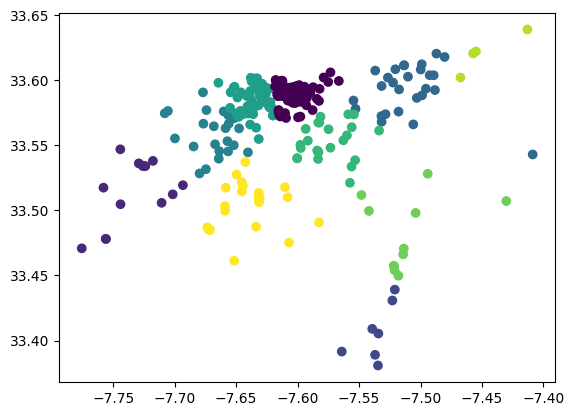

In [200]:
plt.scatter(data.x, data.y, c=data['cluster10'])

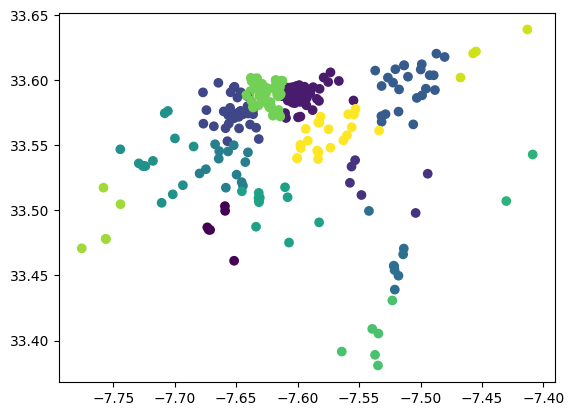

In [201]:
plt.scatter(data.x, data.y, c=data['cluster15'])
#plt.scatter(centers[:,1], centers[:,0], color='red')

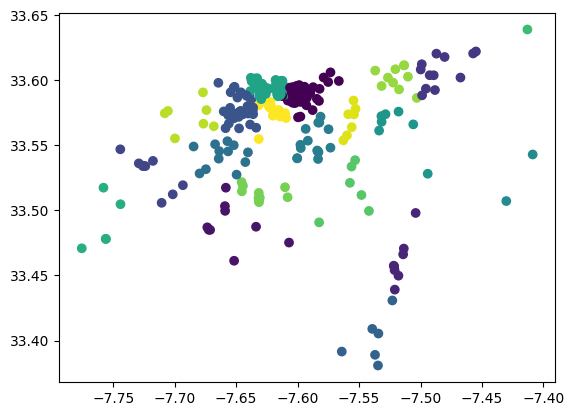

In [202]:
plt.scatter(data.x, data.y, c=data['cluster20'])

<Axes: xlabel='x', ylabel='y'>

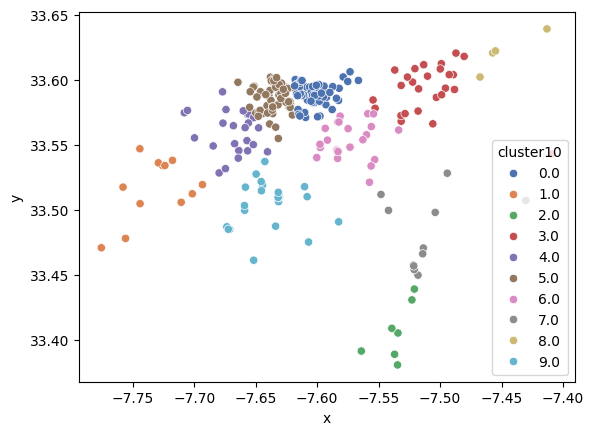

In [203]:
import seaborn as sns
sns.scatterplot(data=data, x='x', y='y', 
                hue='cluster10',
                palette="deep"
               )

In [ ]:
df0 = dt2[dt2.categ == 0]
df0['nom_categ'] = 'SuperMarket'
df0.to_csv('Supermarkets.csv')

df1 = dt2[dt2.categ == 1]
df1['nom_categ'] = 'ATM'
df1.to_csv('ATMs.csv')

df2 = dt2[dt2.categ == 2]
df2['nom_categ'] = 'Fuel Station'
df2.to_csv('Fuel_Stations.csv')

df3 = dt2[dt2.categ == 3]
df3['nom_categ'] = 'Gare station'
df3.to_csv('Gare_Stations.csv')

df4 = dt2[dt2.categ == 4]
df4['nom_categ'] = 'University'
df4.to_csv('Universities.csv')

In [ ]:
d0 = dt2[dt2.cluster == 0]
d1 = dt2[dt2.cluster == 1]
d2 = dt2[dt2.cluster == 2]
d3 = dt2[dt2.cluster == 3]
d4 = dt2[dt2.cluster == 4]
d5 = dt2[dt2.cluster == 5]
d6 = dt2[dt2.cluster == 6]
centers = moyennes_par_cluster(dt2)

Text(0, 0.5, 'Latitude')

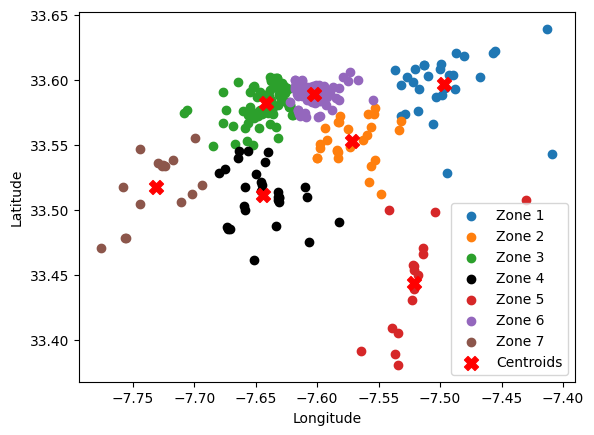

In [14]:
plt.scatter(d0.x, d0.y, label='Zone 1')
plt.scatter(d1.x, d1.y, label='Zone 2')
plt.scatter(d2.x, d2.y, label='Zone 3')
plt.scatter(d3.x, d3.y, label='Zone 4', c='k')
plt.scatter(d4.x, d4.y, label='Zone 5')
plt.scatter(d5.x, d5.y, label='Zone 6')
plt.scatter(d6.x, d6.y, label='Zone 7')
plt.scatter(centers[:,0], centers[:,1],c='red', marker='X', s=100, label='Centroids')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


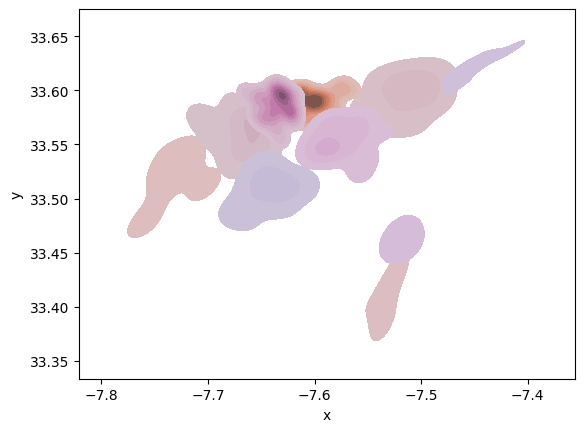

In [147]:
import seaborn as sns
sns.kdeplot(data=data, x=data.x, y=data.y, hue="cluster10", fill=True)
plt.legend().remove()

In [29]:
d1 = data[data.cluster10 == 0]
d2 = data[data.cluster10 == 1]
d3 = data[data.cluster10 == 2]
d4 = data[data.cluster10 == 3]
d5 = data[data.cluster10 == 4]
d6 = data[data.cluster10 == 5]
d7 = data[data.cluster10 == 6]
d8 = data[data.cluster10 == 7]
d9 = data[data.cluster10 == 8]
d10 = data[data.cluster10 == 9]

(72, 9)


<Axes: xlabel='x', ylabel='y'>

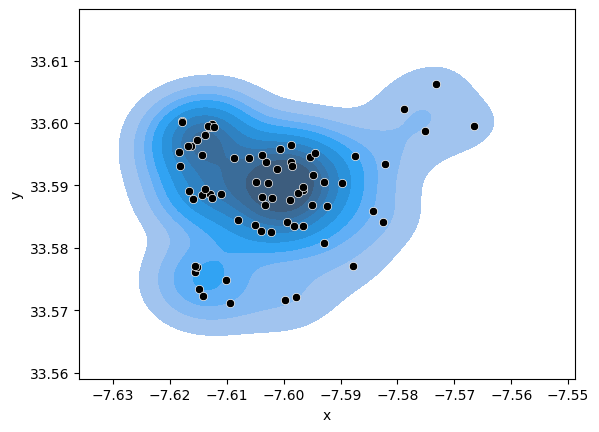

In [154]:
dd = d1
print(dd.shape)
sns.kdeplot(data=dd, x='x', y='y', fill=True)
sns.scatterplot(data=dd, x='x', y='y', c='k')
#plt.legend().remove()

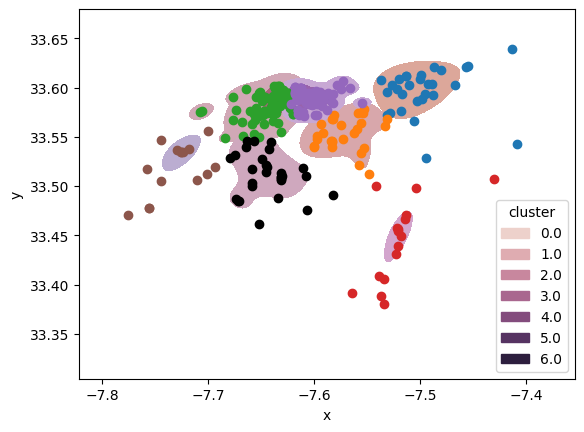

In [18]:

sns.kdeplot(data=dt2, x=dt2.x, y=dt2.y,
            hue="cluster",
            #fill=True,
            levels=3,
            thresh=0.1,
            fill=True
            )
plt.scatter(d0.x, d0.y, label='Zone 1')
plt.scatter(d1.x, d1.y, label='Zone 2')
plt.scatter(d2.x, d2.y, label='Zone 3')
plt.scatter(d3.x, d3.y, label='Zone 4', c='k')
plt.scatter(d4.x, d4.y, label='Zone 5')
plt.scatter(d5.x, d5.y, label='Zone 6')
plt.scatter(d6.x, d6.y, label='Zone 7')

## Elbow + DBSCAN

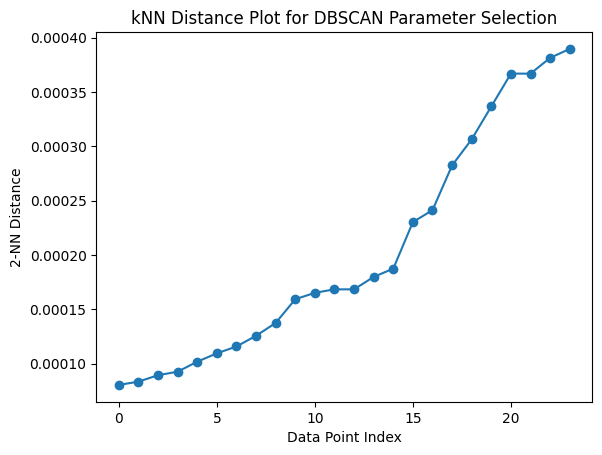

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X doe

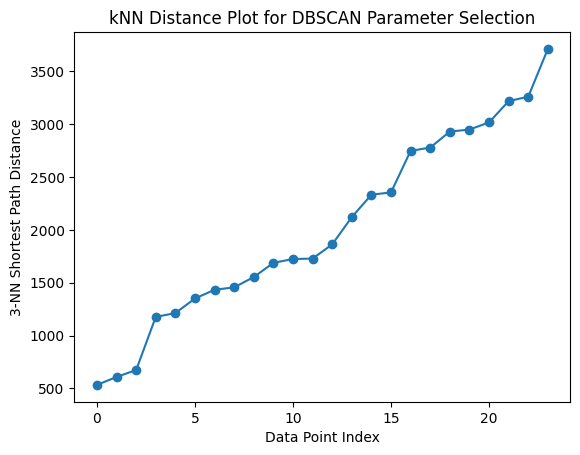

C:\Users\pc\AppData\Local\Temp\ipykernel_20624\168268354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Classe 1')

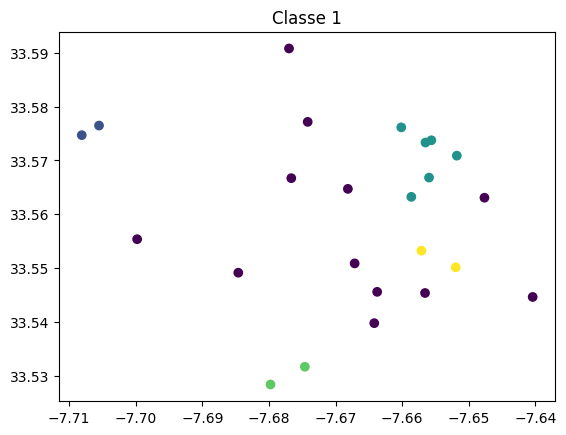

In [156]:
plot_dbscan_elbow1(d5, 2)
plot_dbscan_elbow2(d5, graph, min_samples=3)
dd5 = dbscan_clustering(d5, 0.00015, 3)
plt.scatter(dd5.x, dd5.y, c=dd5['DBcluster'])
plt.title('Classe 5')

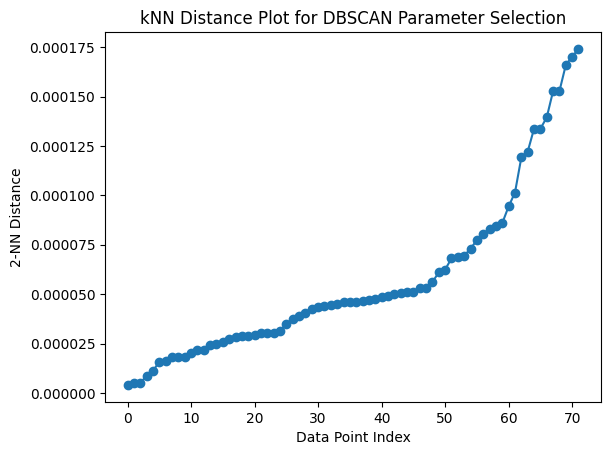

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X doe

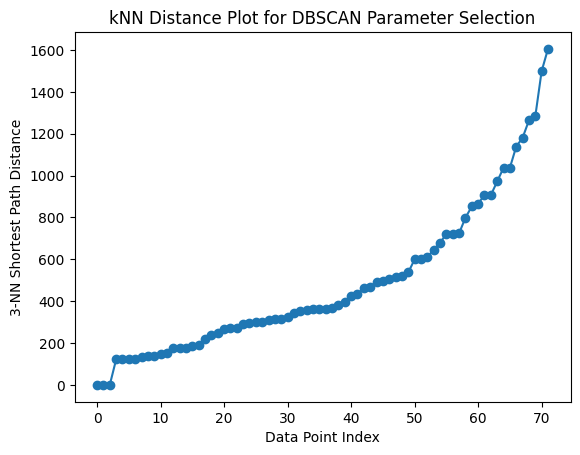

C:\Users\pc\AppData\Local\Temp\ipykernel_20624\168268354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Zone  1')

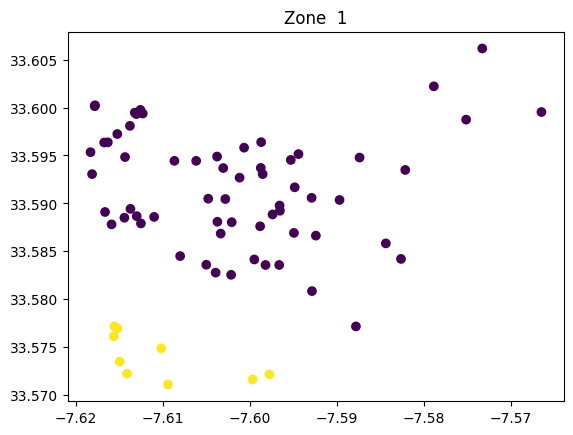

In [157]:
plot_dbscan_elbow1(d1, 2)
plot_dbscan_elbow2(d1, graph, min_samples=3)
dd1 = dbscan_clustering(d1, 0.00015, 3)
plt.scatter(dd1.x, dd1.y, c=dd1['DBcluster'])
plt.title('Zone  1')

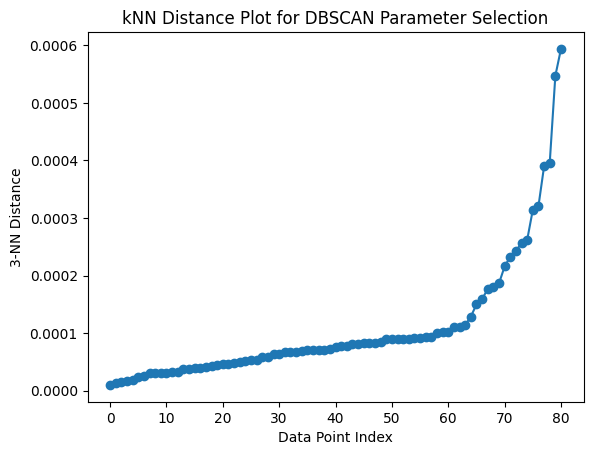

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

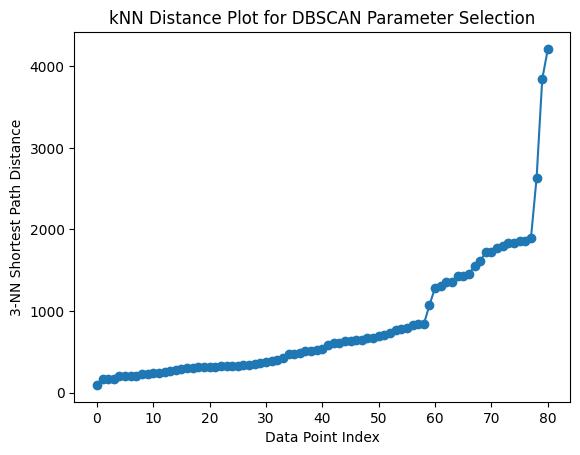

<ipython-input-15-a221fac70646>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Classe 3')

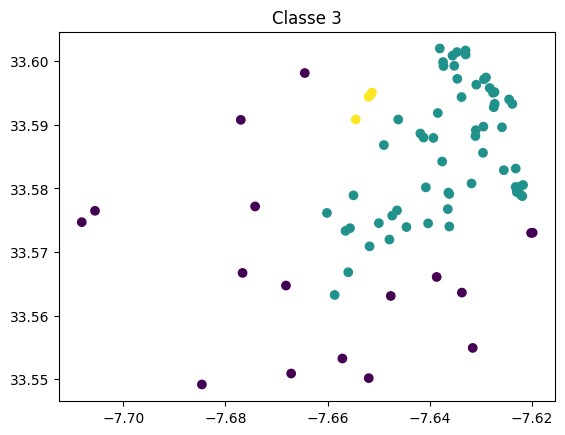

In [ ]:
plot_dbscan_elbow1(d2, 3)
plot_dbscan_elbow2(d2, graph, min_samples=3)
d2 = dbscan_clustering(d2, 0.0001, 3)
plt.scatter(d2.x, d2.y, c=d2['DBcluster'])
plt.title('Classe 3')

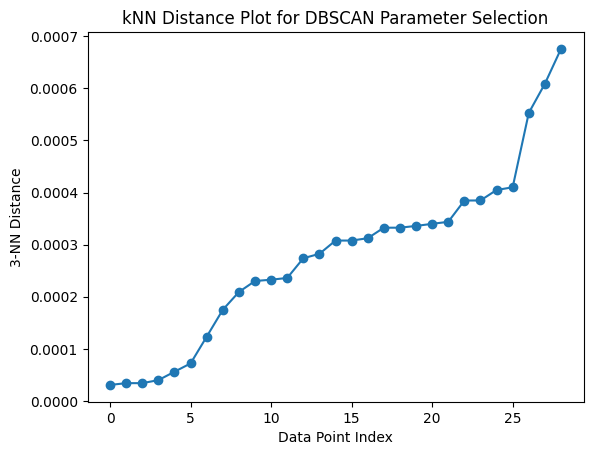

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

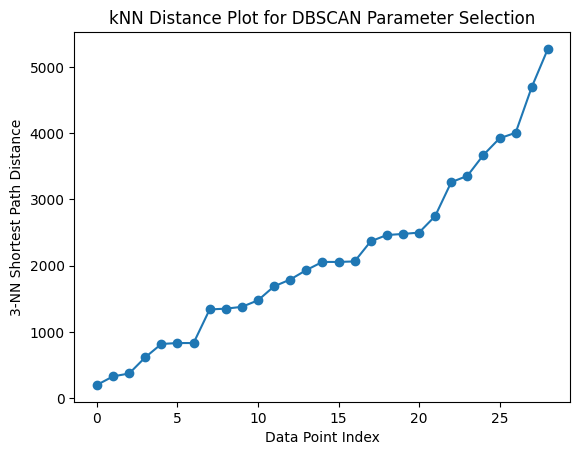

<ipython-input-15-a221fac70646>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Classe 4')

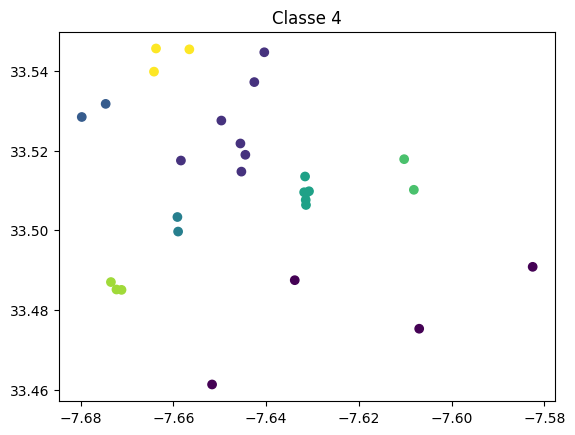

In [ ]:
plot_dbscan_elbow1(d3, 3)
plot_dbscan_elbow2(d3, graph, min_samples=3)
d3 = dbscan_clustering(d3, 0.0002, 2)
plt.scatter(d3.x, d3.y, c=d3['DBcluster'])
plt.title('Classe 4')

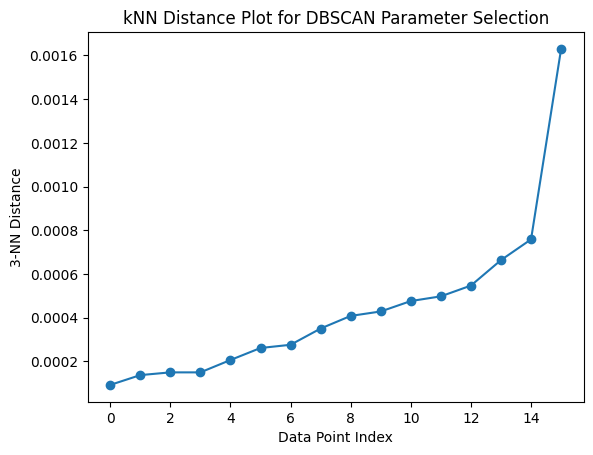

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

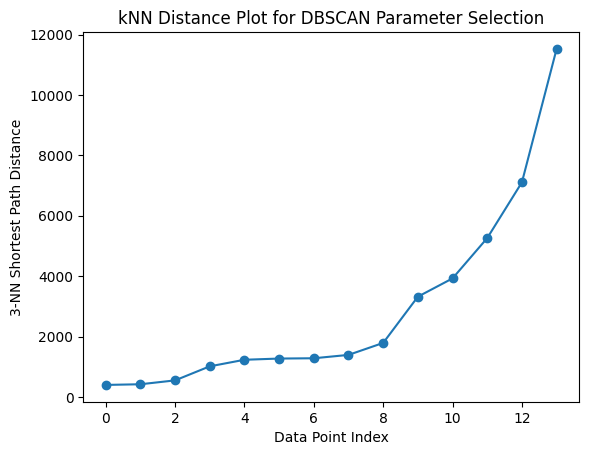

<ipython-input-15-a221fac70646>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Classe 5')

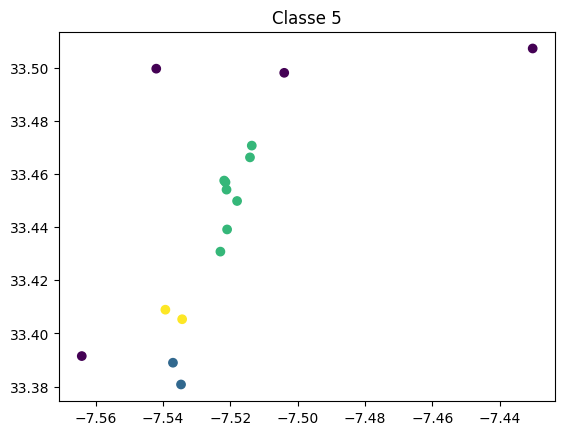

In [ ]:
plot_dbscan_elbow1(d4, 3)
plot_dbscan_elbow2(d4, graph, min_samples=3)
d4 = dbscan_clustering(d4, 0.0002, 2)
plt.scatter(d4.x, d4.y, c=d4['DBcluster'])
plt.title('Classe 5')

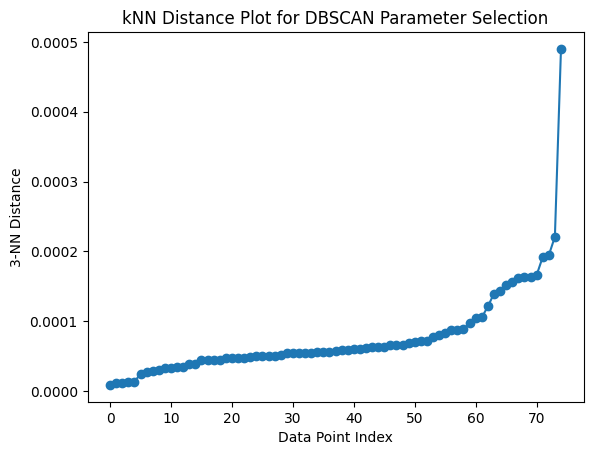

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

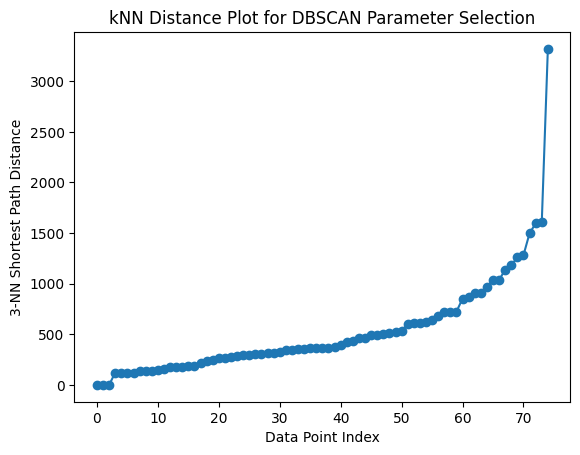

<ipython-input-15-a221fac70646>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Classe 6')

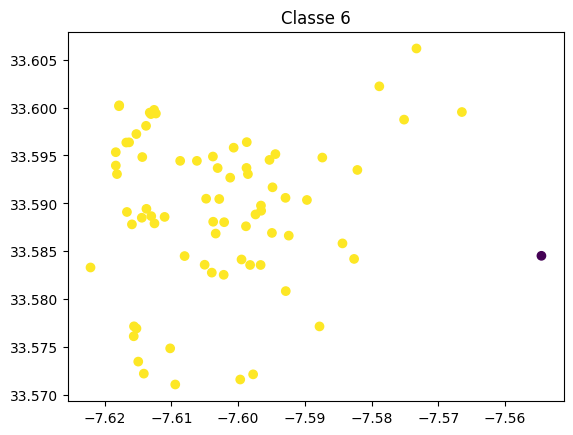

In [ ]:
plot_dbscan_elbow1(d5, 3)
plot_dbscan_elbow2(d5, graph, min_samples=3)
d5 = dbscan_clustering(d5, 0.0002, 2)
plt.scatter(d5.x, d5.y, c=d5['DBcluster'])
plt.title('Classe 6')

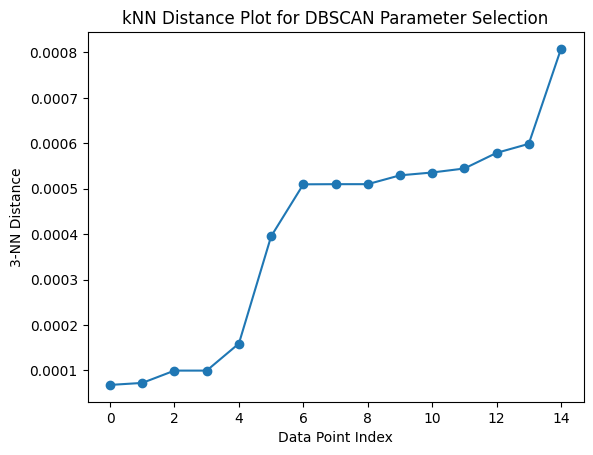

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

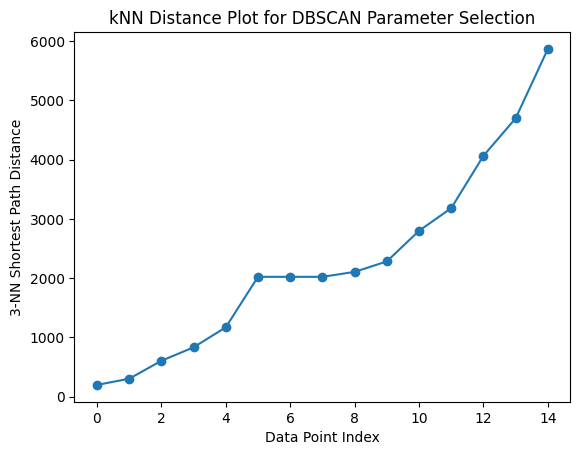

<ipython-input-15-a221fac70646>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBcluster'] = labels


Text(0.5, 1.0, 'Classe 7')

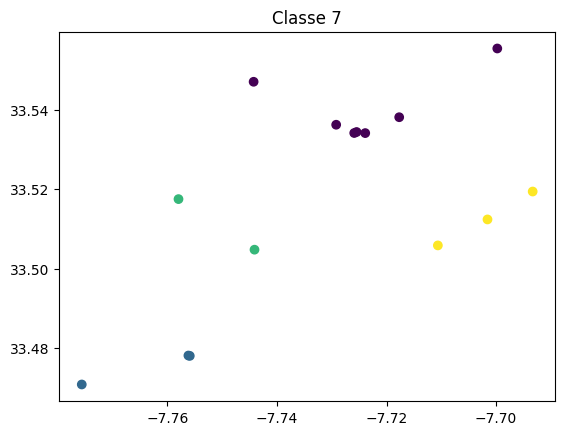

In [ ]:
plot_dbscan_elbow1(d6, 3)
plot_dbscan_elbow2(d6, graph, min_samples=3)
d6 = dbscan_clustering(d6, 0.00045, 2)
plt.scatter(d6.x, d6.y, c=d6['DBcluster'])
plt.title('Classe 7')

In [36]:
import pandas as pd
from scipy.spatial.distance import cdist
import numpy as np

def calculer_effectif_proximite(df, distance_limite):
    # Créer une matrice de distances entre tous les points
    coordonnees = df[['x', 'y']].values
    distances = cdist(coordonnees, coordonnees)

    # Initialiser une liste pour stocker les informations du voisinage
    voisinage_infos = []

    # Parcourir chaque ligne du DataFrame
    for i, row in df.iterrows():
        # Sélectionner les points à une distance inférieure à distance_limite
        indices_proximite = np.where(distances[i] < distance_limite)[0]
        print(f"Ligne {i} selectionnée avec succes")

        # Compter l'effectif de chaque categorie dans le voisinage
        effectif_par_type = df.iloc[indices_proximite]['categ'].value_counts().to_dict()

        # Ajouter les informations du voisinage à la liste
        voisinage_infos.append({
            'distance': distances[i],
            'effectif_par_type': {
                type_: effectif_par_type.get(type_, 0) for type_ in df['categ'].unique()
            }
        })

    # Créer une nouvelle colonne avec les informations du voisinage
    df['voisinage_info'] = voisinage_infos
    return df


In [ ]:
# Exemple d'utilisation
data = {'x': [1, 2, 3, 4, 5],
        'y': [1, 2, 3, 4, 5],
        'type': ['rouge', 'noir', 'bleu', 'vert', 'bleu']}
df = pd.DataFrame(data)

# Distance limite
distance_limite = 2.0

# Appliquer la fonction
calculer_effectif_proximite(df, distance_limite)

# Afficher le DataFrame avec la nouvelle colonne 'voisinage_info'
df

In [34]:
df.voisinage_info[0]

{'distance': array([0.        , 1.41421356, 2.82842712, 4.24264069, 5.65685425]),
 'effectif_par_type': {'rouge': 1, 'noir': 1, 'bleu': 0, 'vert': 0}}

In [135]:

def resumer(df, distance_limite):
    dframe = calculer_effectif_proximite1(df[['x', 'y', 'categ']], distance_limite)
    dframe1 = pd.DataFrame(list(dframe.voisinage_info))
    dframe2 = pd.DataFrame(list(dframe1.effectif_par_type))
    dframe2.columns = ['SuperMarkets', 'ATMs', 'Fuel_Stations','Gares_stations', 'Universités']
    dframe2['tot_voisinage'] = dframe2.sum(axis=1)
    
    return pd.concat([df[['x', 'y', 'categ']] ,dframe1, dframe2], axis=1)

resumer(dt2, 1)

<class 'geopy.distance.geodesic'>


,x,y,categ,distance,indices_proximite,effectif_par_type,SuperMarkets,ATMs,Fuel_Stations,Gares_stations,Universités,tot_voisinage
0,-7.640401,33.544667,0,"[0.0, 6.938224663731679, 7.114444300771993, 4....","[0, 192]","{0: 1, 1: 0, 2: 1, 3: 0, 4: 0}",1,0,1,0,0,2
1,-7.595292,33.594538,0,"[6.938224663731679, 0.0, 10.701468475454153, 7...","[1, 34, 48, 63, 86, 89, 126, 127, 128, 149, 15...","{0: 6, 1: 3, 2: 12, 3: 1, 4: 0}",6,3,12,1,0,22
2,-7.708105,33.574692,0,"[7.114444300771993, 10.701468475454153, 0.0, 3...","[2, 146]","{0: 1, 1: 1, 2: 0, 3: 0, 4: 0}",1,1,0,0,0,2
3,-7.674181,33.577157,0,"[4.777578828822882, 7.572860407047469, 3.16132...",[3],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}",1,0,0,0,0,1
4,-7.639303,33.587934,0,"[4.80004463277356, 4.150518473137207, 6.553884...","[4, 6, 10, 12, 21, 30, 40, 61, 102, 106, 113, ...","{0: 10, 1: 2, 2: 1, 3: 1, 4: 0}",10,2,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
267,-7.627492,33.592754,4,"[5.466617062631142, 2.995387224725248, 7.74706...","[11, 25, 26, 27, 30, 40, 100, 106, 111, 112, 1...","{0: 8, 1: 6, 2: 2, 3: 3, 4: 1}",8,6,2,3,1,20
268,-7.663752,33.545617,4,"[2.1712764759588463, 8.35735938675177, 5.23083...","[268, 269, 270, 271]","{0: 0, 1: 0, 2: 0, 3: 0, 4: 4}",0,0,0,0,4,4
269,-7.667131,33.550893,4,"[2.5767589826281188, 8.241518760220801, 4.6306...","[257, 268, 269]","{0: 0, 1: 0, 2: 0, 3: 1, 4: 2}",0,0,0,1,2,3
270,-7.664188,33.539804,4,"[2.2741402426456463, 8.819116350685022, 5.6218...","[268, 270, 271]","{0: 0, 1: 0, 2: 0, 3: 0, 4: 3}",0,0,0,0,3,3


In [86]:
dframe1 = pd.DataFrame(list(dframe.voisinage_info))
dframe1

,distance,indices_proximite,effectif_par_type
0,"[0.0, 0.06724567141459462, 0.07406288655223886...",[0],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}"
1,"[0.06724567141459462, 0.0, 0.11454504040337213...",[1],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}"
2,"[0.07406288655223886, 0.11454504040337213, 0.0...",[2],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}"
3,"[0.04686913464381533, 0.08078146538272148, 0.0...",[3],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}"
4,"[0.043281112082865926, 0.04450427206021906, 0....",[4],"{0: 1, 1: 0, 2: 0, 3: 0, 4: 0}"
...,...,...,...
267,"[0.049790013892345976, 0.03224899393469507, 0....",[267],"{0: 0, 1: 0, 2: 0, 3: 0, 4: 1}"
268,"[0.023370428778693973, 0.08414304190899997, 0....",[268],"{0: 0, 1: 0, 2: 0, 3: 0, 4: 1}"
269,"[0.02744604820370185, 0.08405864173301883, 0.0...",[269],"{0: 0, 1: 0, 2: 0, 3: 0, 4: 1}"
270,"[0.024278770110531624, 0.0879912395794044, 0.0...",[270],"{0: 0, 1: 0, 2: 0, 3: 0, 4: 1}"


In [87]:
dframe2 = pd.DataFrame(list(dframe1.effectif_par_type))
dframe2.columns = ['SuperMarkets', 'ATMs', 'Fuel_Stations','Gares_stations', 'Universités']
dframe2.head()
# 0 -------> SuperMarkets
# 1 -------> ATMs
# 2 -------> Fuel Stations
# 3 -------> Gares stations
# 4 -------> Universités

,SuperMarkets,ATMs,Fuel_Stations,Gares_stations,Universités
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [91]:
dframe2['tot_voisinage'] = dframe2.sum(axis=1)
dframe2[dframe2.tot_voisinage==3]

,SuperMarkets,ATMs,Fuel_Stations,Gares_stations,Universités,tot_voisinage


In [82]:
distance_limite = 0.0001
dframe3 = calculer_effectif_proximite(dt2[['x', 'y', 'categ']], distance_limite)
dframe3[dframe3.categ==0] #.effectif_par_type

distance  0  affectées


,x,y,categ,nb_points_proximite,effectif_par_type,indexes_proximite,distance
0,-7.640401,33.544667,0,1,{0: 1},[0],0.000000
1,-7.595292,33.594538,0,0,,,0.067246
2,-7.708105,33.574692,0,0,,,0.074063
3,-7.674181,33.577157,0,0,,,0.046869
4,-7.639303,33.587934,0,0,,,0.043281
...,...,...,...,...,...,...,...
106,-7.629520,33.589711,0,0,,,0.046340
107,-7.647643,33.563083,0,0,,,0.019789
108,-7.609412,33.571087,0,0,,,0.040722
109,-7.613731,33.589428,0,0,,,0.052104
